In [37]:
# results obtained from E1
degree = 3
compression_rate = 0.3
eps = 1e-7

In [38]:
%%time
from utils.data import load_ucr_dataset, load_ucr_data_short_and_medium, load_gbnc_data

# load data
#data = load_ucr_data_short_and_medium()
data = load_ucr_dataset(53)
#data = load_gbnc_data()
print("number of time series:", len(data.index))


number of time series: 135
CPU times: total: 15.6 ms
Wall time: 26 ms


In [39]:
def fit_curve_to_data(method: str, ts: [(float, float)], knots: [float], num_coeffs: int, degree=None):
    fitted_curve = None
    match method:
        case 'PAA':
            degree = 0
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'PLA':
            degree = 1
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8':
            if degree is None:
                degree = 3

            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8 and L1':
            if degree is None:
                degree = 3

            _, result = fit_max_l1_spline(ts, knots, degree, eps=eps)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'LSQ':
            if degree is None:
                degree = 3

            result = fit_LSQ_spline(time_series=ts, knots=knots, degree=degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'DFT':
            result = fit_DFT(ts, num_coeffs)
            fitted_curve = calculate_inverse_DFT(len(ts), num_coeffs, result)

    return fitted_curve

In [40]:
def calculate_error_measures(data_points: [float], fitted_curve: [float]):
    assert len(data_points) == len(fitted_curve)
    
    max_dist = np.max(np.abs(np.array(fitted_curve) - np.array(data_points)))
    mse = mean_squared_error(fitted_curve, data_points)
    mae = mean_absolute_error(fitted_curve, data_points)

    return {'max_dist': max_dist,
            'MSE': mse,
            'MAE': mae}

In [41]:
from utils.plot import add_fitted_curve_to_plot
import numpy as np


def fit_spline(method: str, ts: [(float, float)], knots: [float], num_coeffs: int, degree=None, plot=False, axis=None):
    match method:
        case 'PAA':
            color = 'tab:gray'
            degree = 0
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'PLA':
            color = 'tab:olive'
            degree = 1
            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8':
            color = 'tab:pink'
            if degree is None:
                degree = 3

            _, result = fit_max_spline(ts, knots, degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'L8 and L1':
            color = 'tab:blue'
            if degree is None:
                degree = 3

            _, result = fit_max_l1_spline(ts, knots, degree, eps=eps)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'LSQ':
            color = 'tab:purple'
            if degree is None:
                degree = 3

            result = fit_LSQ_spline(time_series=ts, knots=knots, degree=degree)
            fitted_curve = [evaluate_spline(knots, result, degree, x[0]) for x in ts]

        case 'DFT':
            color = 'tab:green'
            result = fit_DFT(ts, num_coeffs)
            fitted_curve = calculate_inverse_DFT(len(ts), num_coeffs, result)

    max_dist = np.max(np.abs(np.array(fitted_curve) - np.array([x[1] for x in ts])))
    mse = mean_squared_error(fitted_curve, [x[1] for x in ts])
    mae = mean_absolute_error(fitted_curve, [x[1] for x in ts])

    if plot:
        if axis is not None:
            add_fitted_curve_to_plot(axis, [x[0] for x in ts], fitted_curve, max_dist, color=color, label=method)
        else:
            add_fitted_curve_to_plot(plt, [x[0] for x in ts], fitted_curve, max_dist, color=color, label=method)

    return {'max_dist': max_dist,
            'MSE': mse,
            'MAE': mae}


# MIT AUSREISSERN, OHNE PLOTS

GunPointMaleVersusFemale no. 0, 0.0% processed
n_outliers 21
num_outliers_removed 0
      method   max_dist        MSE        MAE
0         L8 1.68355739 1.41539340 1.10357943
1  L8 and L1 1.65155319 1.40396863 1.09991480
2        LSQ 1.65168176 1.40305680 1.09999635
3        PAA 1.91062984 1.66677285 1.19603772
4        PLA 1.70257934 1.32142973 1.06610153
5        DFT 1.64364885 1.40303189 1.09975172


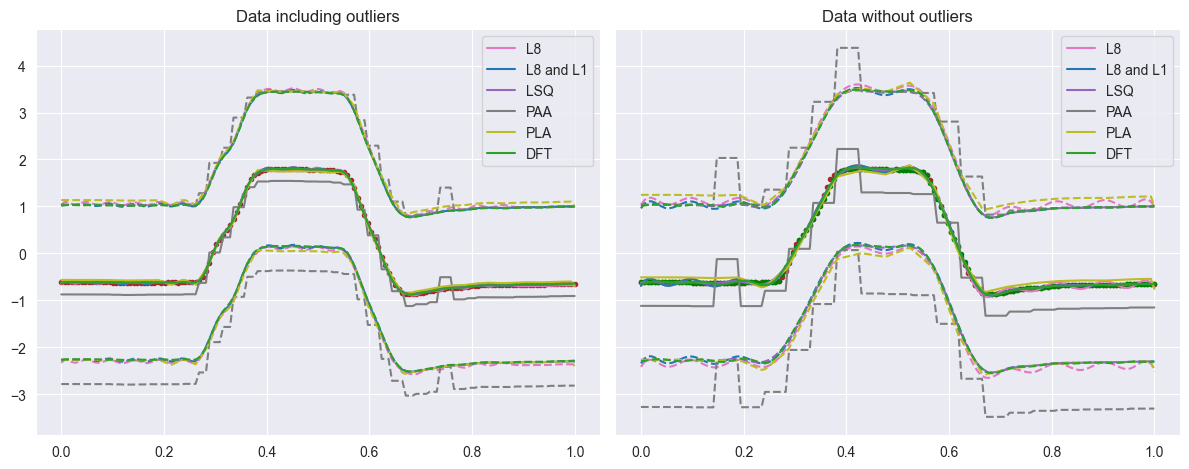

GunPointMaleVersusFemale no. 1, 0.7% processed
n_outliers 19
num_outliers_removed 0
       method   max_dist        MSE        MAE
6          L8 1.79797046 1.30921439 1.06542516
7   L8 and L1 1.61214481 1.16175629 1.00222651
8         LSQ 1.61630390 1.15365334 1.00189426
9         PAA 1.83225973 1.40670874 1.11636862
10        PLA 1.78939270 0.86818931 0.85397288
11        DFT 1.61978261 1.15532635 1.00270348
num_outliers_removed 19
       method   max_dist        MSE        MAE
12         L8 1.65978270 1.22980484 1.03451606
13  L8 and L1 1.61152847 1.22614326 1.03374213
14        LSQ 1.61191531 1.22597895 1.03555590
15        PAA 2.09439754 1.78241180 1.20840651
16        PLA 1.65527041 1.11489479 0.98115032
17        DFT 1.63733387 1.24241196 1.04369368


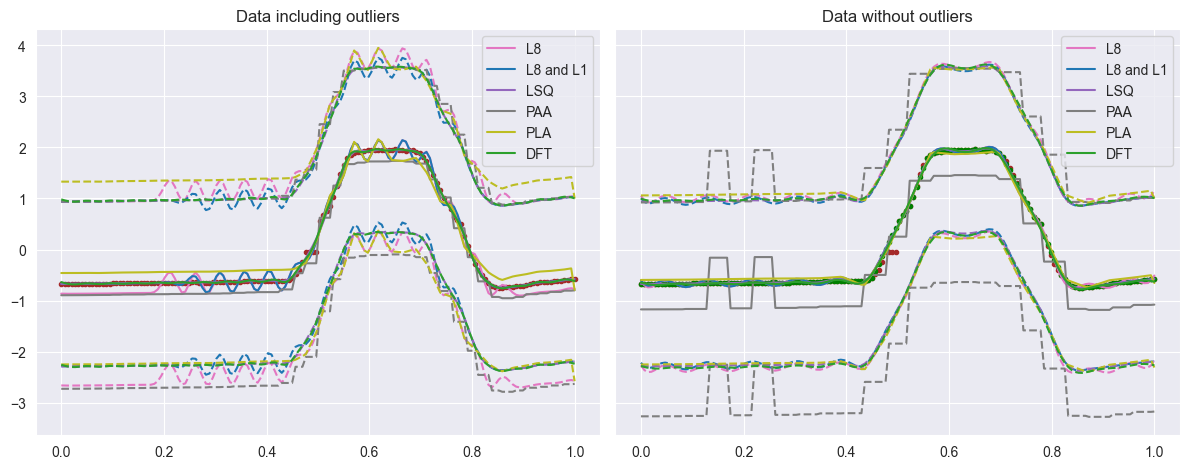

GunPointMaleVersusFemale no. 2, 1.5% processed
n_outliers 17
num_outliers_removed 0
       method   max_dist        MSE        MAE
18         L8 1.98198204 1.68925871 1.21304825
19  L8 and L1 1.98194069 1.67795583 1.20896740
20        LSQ 1.98027394 1.67783886 1.20880898
21        PAA 1.95425538 2.05267015 1.34935900
22        PLA 1.95599969 1.62160335 1.18636340
23        DFT 1.98299927 1.67728192 1.20894695


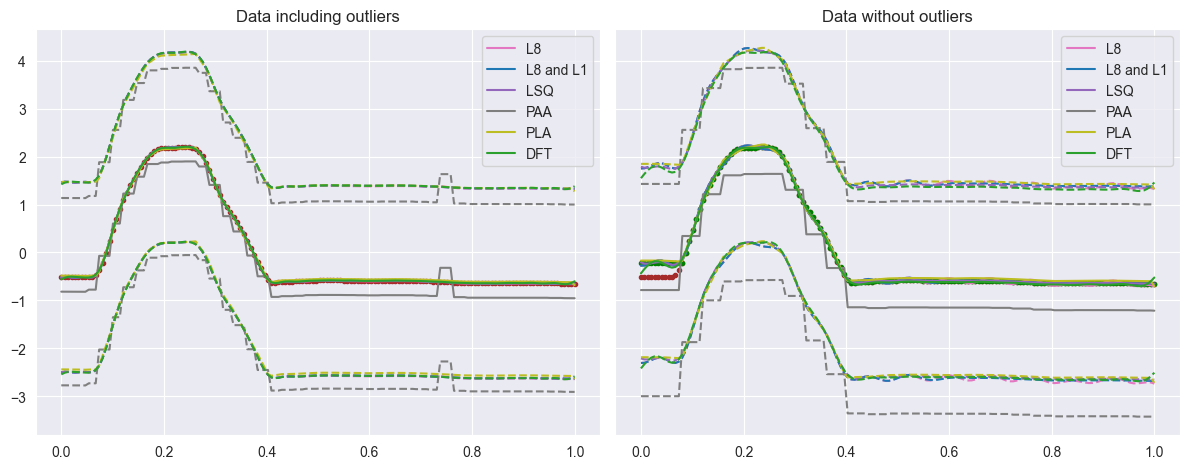

GunPointMaleVersusFemale no. 3, 2.2% processed
n_outliers 24
num_outliers_removed 0
       method   max_dist        MSE        MAE
24         L8 1.93782761 1.57725421 1.14241560
25  L8 and L1 1.72785537 1.37538298 1.08190833
26        LSQ 1.72781259 1.36408027 1.07955726
27        PAA 2.06660158 1.72450392 1.19561546
28        PLA 1.96955001 0.95680711 0.88884143
29        DFT 1.72464682 1.36507366 1.08027349
num_outliers_removed 24
       method   max_dist        MSE        MAE
30         L8 1.79987226 1.51864480 1.15937968
31  L8 and L1 1.72785537 1.52053980 1.16048061
32        LSQ 1.73213099 1.51635285 1.15902338
33        PAA 2.30357980 2.27273818 1.33549315
34        PLA 1.90032490 1.26539859 1.05606490
35        DFT 1.70216946 1.52908159 1.16553663


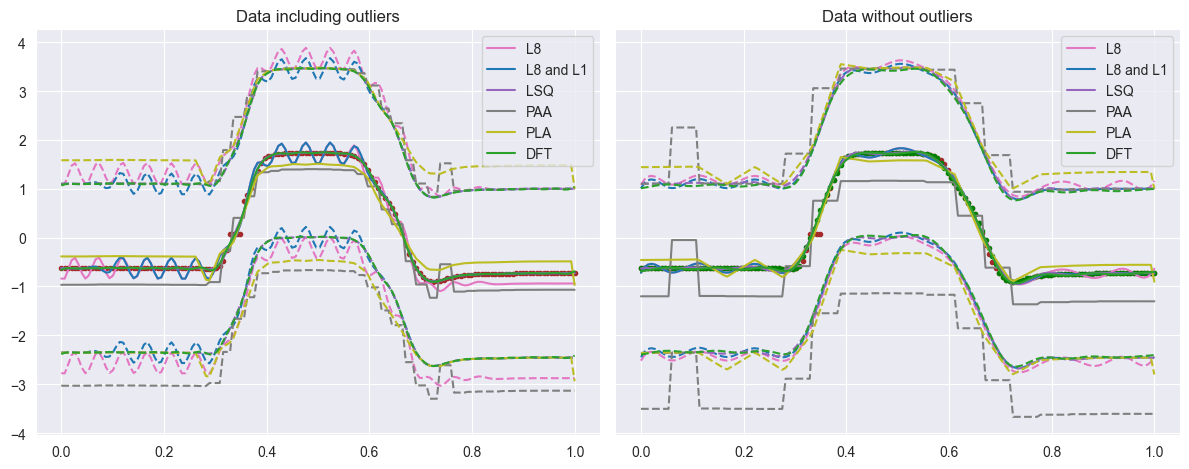

GunPointMaleVersusFemale no. 4, 3.0% processed
n_outliers 22
num_outliers_removed 0
       method   max_dist        MSE        MAE
36         L8 1.78724923 1.41262606 1.11056429
37  L8 and L1 1.78725035 1.40220167 1.10720069
38        LSQ 1.78728489 1.40200755 1.10728942
39        PAA 1.96266341 1.85624068 1.29631777
40        PLA 1.76556498 1.36560688 1.09229366
41        DFT 1.78466733 1.40299961 1.10732807
num_outliers_removed 22
       method   max_dist        MSE        MAE
42         L8 1.76907374 1.57422005 1.20335528
43  L8 and L1 1.76907313 1.57284790 1.20295864
44        LSQ 1.75689801 1.57406078 1.20465314
45        PAA 2.19477277 2.18411379 1.40943949
46        PLA 1.79545962 1.42237011 1.13751207
47        DFT 1.78457091 1.60798673 1.21984687


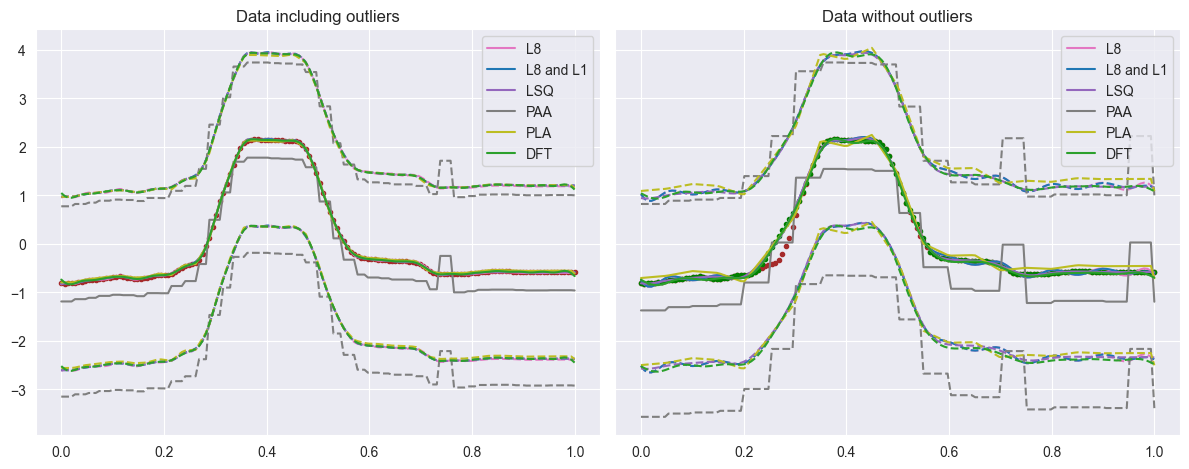

GunPointMaleVersusFemale no. 5, 3.7% processed
n_outliers 19
num_outliers_removed 0
       method   max_dist        MSE        MAE
48         L8 1.81106268 1.55660694 1.15067602
49  L8 and L1 1.70084179 1.47472903 1.12875272
50        LSQ 1.66293954 1.46925343 1.12696406
51        PAA 2.10743698 2.01550238 1.30844035
52        PLA 1.81926811 1.18020854 1.00073513
53        DFT 1.66543045 1.46967995 1.12689234
num_outliers_removed 19
       method   max_dist        MSE        MAE
54         L8 1.71090419 1.58115200 1.17833343
55  L8 and L1 1.66260350 1.58319494 1.17966146
56        LSQ 1.66214804 1.57917479 1.17712351
57        PAA 2.11824798 2.18745501 1.34782013
58        PLA 1.74884755 1.43887913 1.11596382
59        DFT 1.66661047 1.59383816 1.18442132


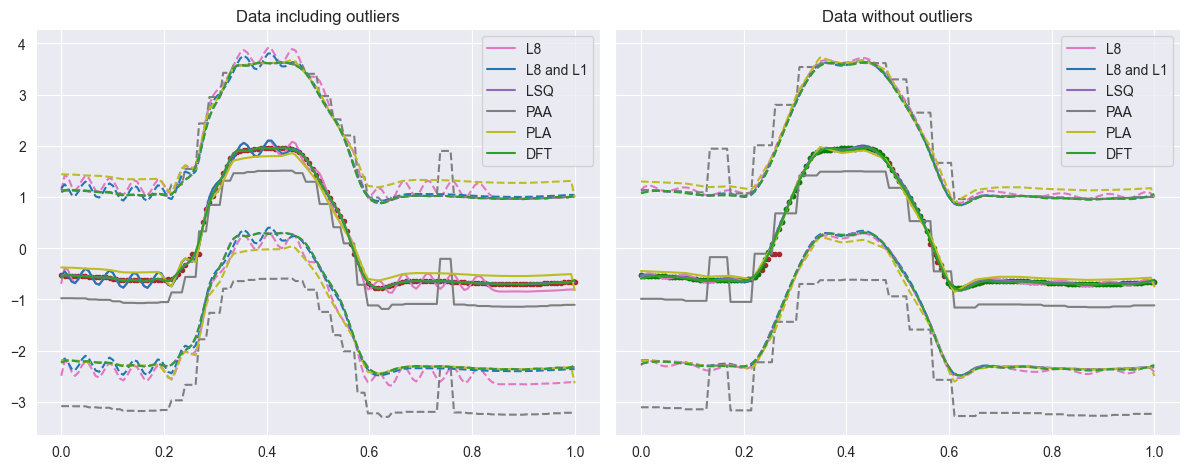

GunPointMaleVersusFemale no. 6, 4.4% processed
n_outliers 19
num_outliers_removed 0
       method   max_dist        MSE        MAE
60         L8 1.84132599 1.42868433 1.08741989
61  L8 and L1 1.79749893 1.41313041 1.08389695
62        LSQ 1.79740169 1.41234171 1.08399695
63        PAA 2.15269548 1.79513146 1.20454850
64        PLA 1.85797692 1.31298255 1.04346545
65        DFT 1.80134065 1.41160901 1.08385347


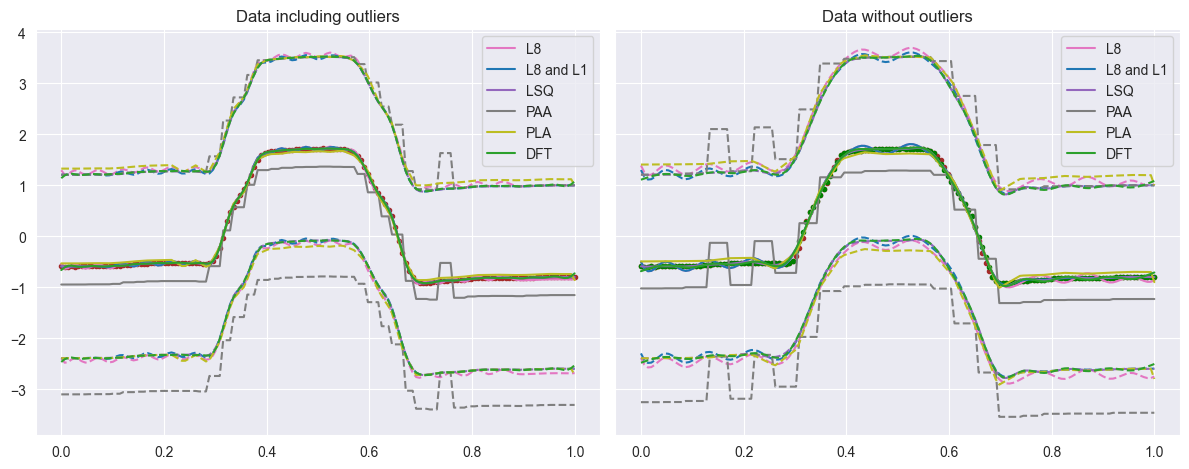

GunPointMaleVersusFemale no. 7, 5.2% processed
n_outliers 24
num_outliers_removed 0
       method   max_dist        MSE        MAE
66         L8 1.79102562 1.64058107 1.20035744
67  L8 and L1 1.79102338 1.63840974 1.19968616
68        LSQ 1.78686166 1.63806319 1.19955852
69        PAA 1.89597777 1.95239270 1.31446267
70        PLA 1.77659482 1.58903549 1.18158092
71        DFT 1.79023502 1.63829875 1.19969585


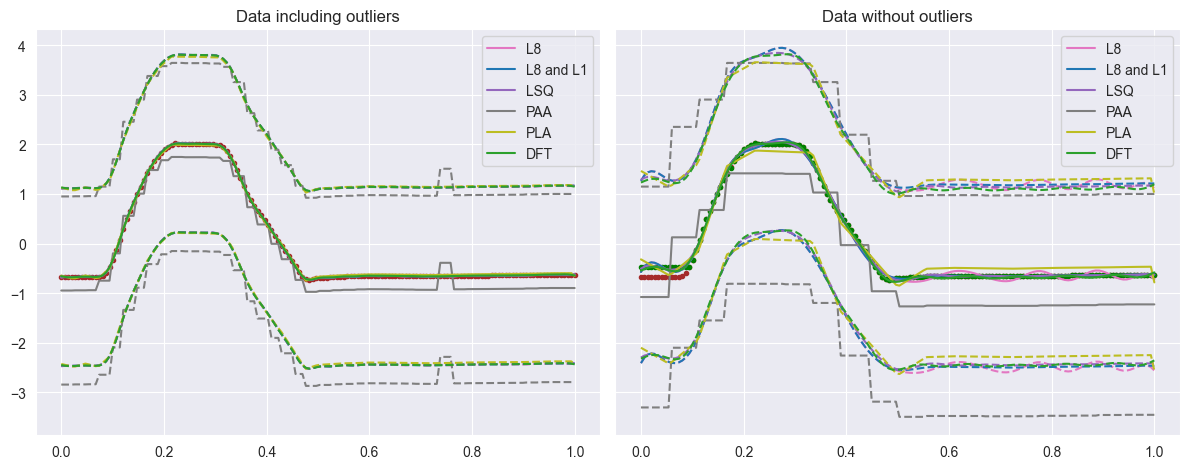

GunPointMaleVersusFemale no. 8, 5.9% processed
n_outliers 25
num_outliers_removed 0
       method   max_dist        MSE        MAE
72         L8 1.76827710 1.51272461 1.15563777
73  L8 and L1 1.59387671 1.33883054 1.09218696
74        LSQ 1.56638578 1.32932541 1.08990870
75        PAA 2.14332708 2.09407511 1.32257682
76        PLA 1.77237304 0.96869254 0.92504936
77        DFT 1.60657834 1.33111693 1.09023791
num_outliers_removed 25
       method   max_dist        MSE        MAE
78         L8 1.64175255 1.49500882 1.17614653
79  L8 and L1 1.64175265 1.49391223 1.17569351
80        LSQ 1.58537954 1.48085202 1.17194738
81        PAA 2.28815885 2.53223678 1.42084971
82        PLA 1.69292459 1.36748001 1.11371129
83        DFT 1.63213464 1.50152237 1.17993633


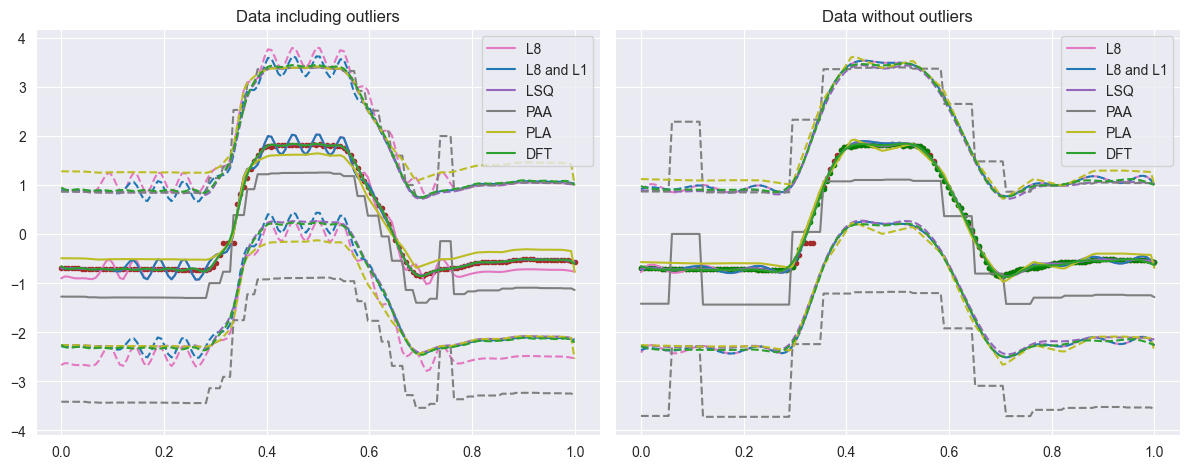

GunPointMaleVersusFemale no. 9, 6.7% processed
n_outliers 20
num_outliers_removed 0
       method   max_dist        MSE        MAE
84         L8 1.77052204 1.51743651 1.12879409
85  L8 and L1 1.77052214 1.49400898 1.12090385
86        LSQ 1.77360945 1.49323975 1.12066092
87        PAA 2.00650742 1.85252992 1.27424342
88        PLA 1.76673763 1.42958150 1.09331689
89        DFT 1.76143807 1.49310535 1.12087088


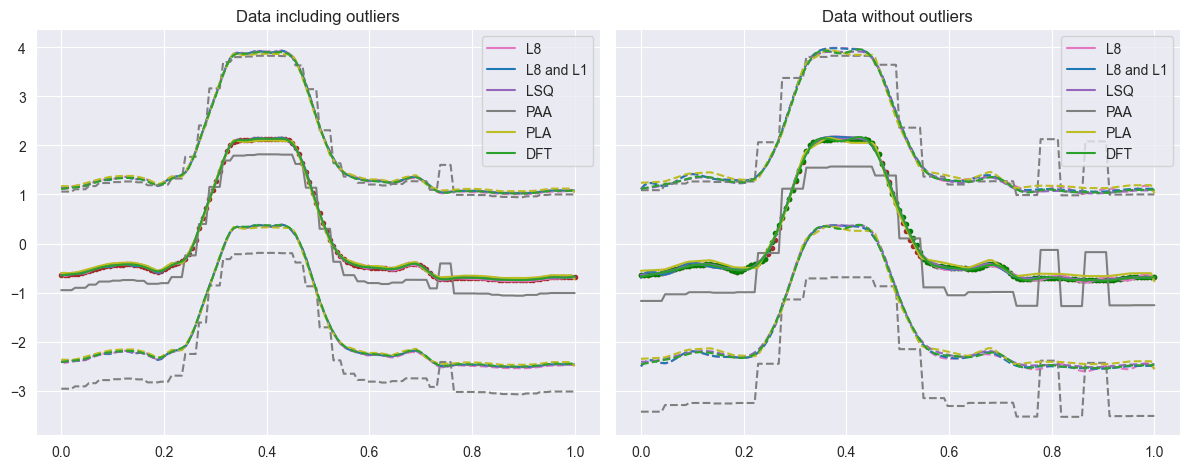

GunPointMaleVersusFemale no. 10, 7.4% processed
n_outliers 11
num_outliers_removed 0
       method   max_dist        MSE        MAE
90         L8 1.77607696 1.63315224 1.19694774
91  L8 and L1 1.77556066 1.62407692 1.19371987
92        LSQ 1.76702951 1.62403238 1.19365667
93        PAA 1.93112526 1.97372452 1.31791828
94        PLA 1.74257976 1.56001933 1.16936941
95        DFT 1.76546629 1.62378264 1.19360281


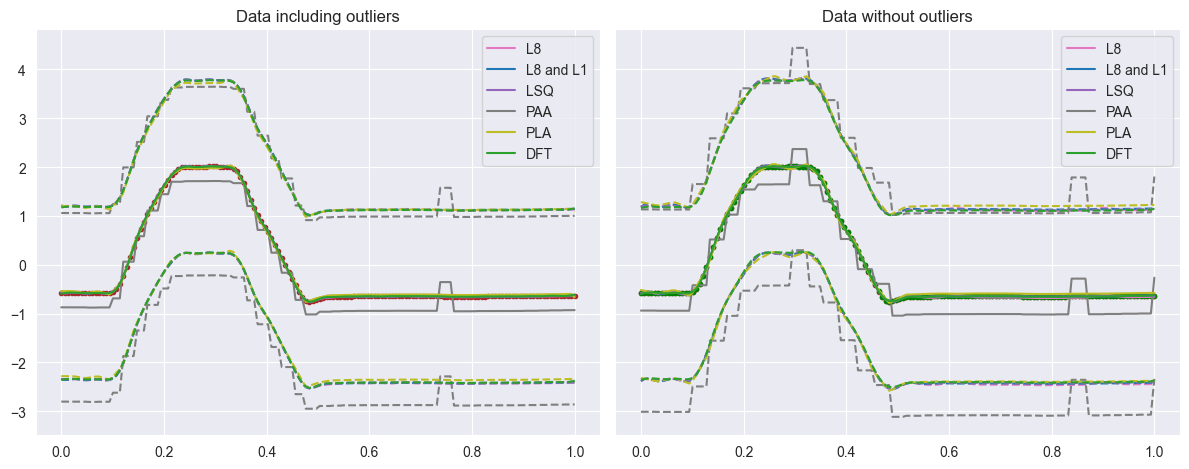

GunPointMaleVersusFemale no. 11, 8.1% processed
n_outliers 14
num_outliers_removed 0
        method   max_dist        MSE        MAE
96          L8 1.79524275 1.60987288 1.18461607
97   L8 and L1 1.79591239 1.59936903 1.18018509
98         LSQ 1.77821155 1.59901078 1.18005089
99         PAA 1.92420873 1.90748418 1.29561200
100        PLA 1.74089594 1.53217509 1.15357975
101        DFT 1.77569280 1.59880355 1.18022061


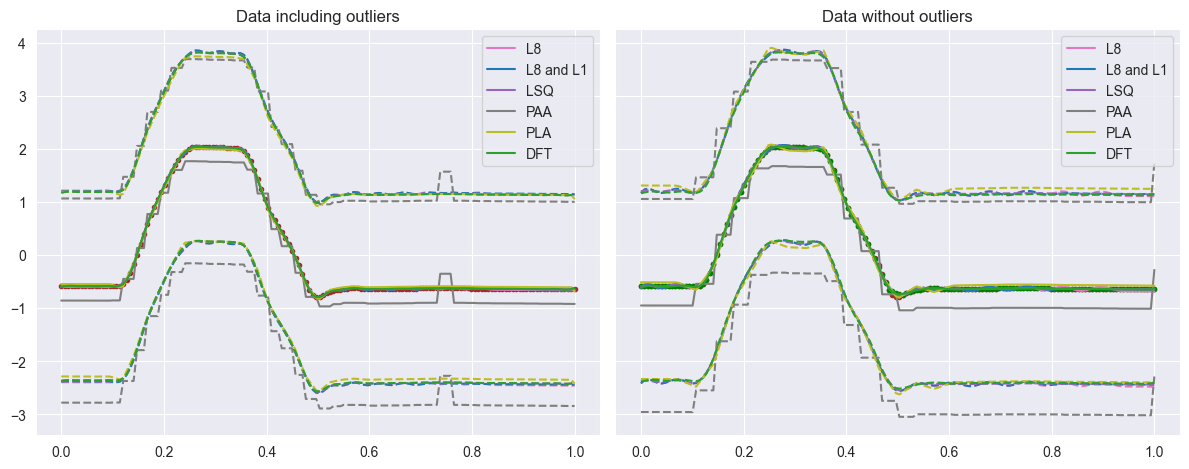

GunPointMaleVersusFemale no. 12, 8.9% processed
n_outliers 7
num_outliers_removed 0
        method   max_dist        MSE        MAE
102         L8 1.85767163 1.65520331 1.20181146
103  L8 and L1 1.85767173 1.64673447 1.19885063
104        LSQ 1.84789385 1.64722865 1.19902186
105        PAA 1.99464418 2.09872261 1.36664679
106        PLA 1.81144645 1.56901041 1.16871193
107        DFT 1.85262458 1.64691790 1.19926746
num_outliers_removed 7
        method   max_dist        MSE        MAE
108         L8 1.85336884 1.71494418 1.23076827
109  L8 and L1 1.85336894 1.70701841 1.22741778
110        LSQ 1.84718210 1.70680553 1.22726639
111        PAA 1.99464418 2.14293612 1.36988026
112        PLA 1.82307916 1.58641851 1.18122540
113        DFT 1.84670774 1.70682796 1.22767882


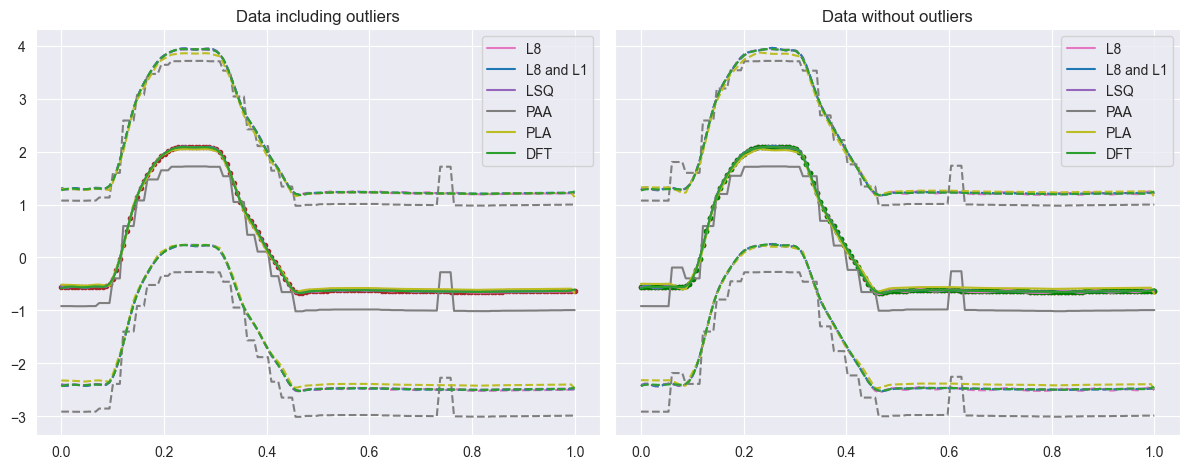

GunPointMaleVersusFemale no. 13, 9.6% processed
n_outliers 12
num_outliers_removed 0
        method   max_dist        MSE        MAE
114         L8 1.84021867 1.62646334 1.19600866
115  L8 and L1 1.83950354 1.62400365 1.19492494
116        LSQ 1.83726519 1.62353442 1.19469945
117        PAA 1.97278120 2.04921949 1.34523523
118        PLA 1.82950972 1.56282266 1.17136357
119        DFT 1.84143099 1.62322640 1.19464161


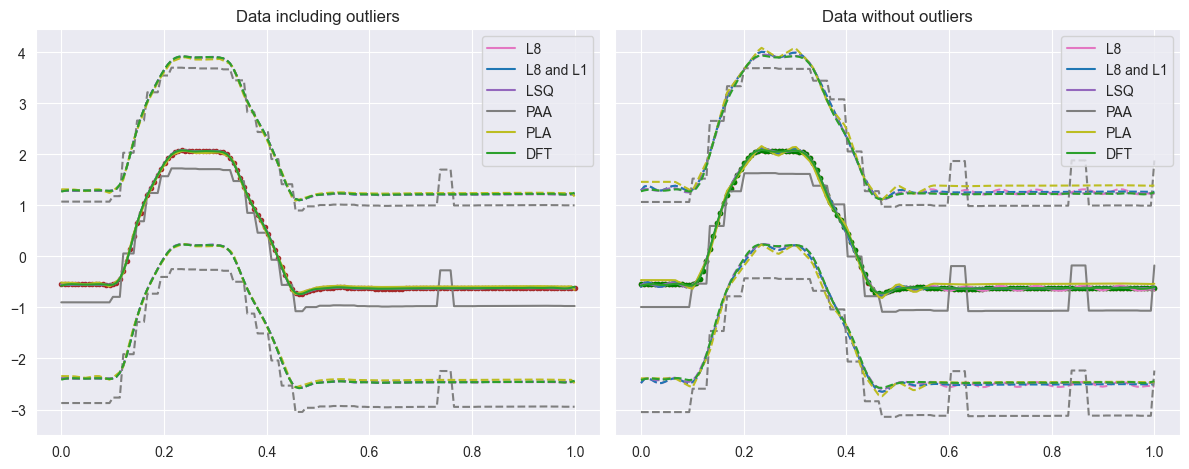

GunPointMaleVersusFemale no. 14, 10.4% processed
n_outliers 17
num_outliers_removed 0
        method   max_dist        MSE        MAE
120         L8 2.21760159 2.00735046 1.26361230
121  L8 and L1 1.96159711 1.45913333 1.08812782
122        LSQ 1.80770801 1.42554838 1.08964868
123        PAA 2.70466238 2.91021185 1.52128810
124        PLA 2.25026696 0.79331905 0.77232843
125        DFT 1.81556531 1.43066872 1.09081106
num_outliers_removed 17
        method   max_dist        MSE        MAE
126         L8 1.87673882 1.50857188 1.12886436
127  L8 and L1 1.80769779 1.49194620 1.12397323
128        LSQ 1.80878852 1.49845234 1.12875165
129        PAA 2.65403758 3.10534016 1.63504243
130        PLA 1.91794922 1.32196607 1.05304555
131        DFT 1.78504903 1.52465861 1.13167215


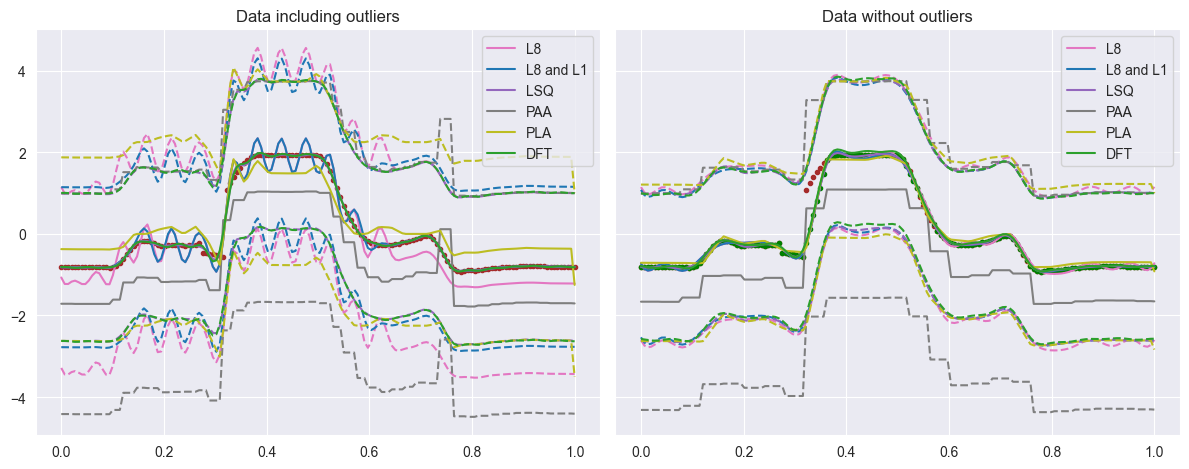

GunPointMaleVersusFemale no. 15, 11.1% processed
n_outliers 23
num_outliers_removed 0
        method   max_dist        MSE        MAE
132         L8 1.65899397 1.41979041 1.11544817
133  L8 and L1 1.65495617 1.42124635 1.11599850
134        LSQ 1.64875265 1.41947847 1.11530252
135        PAA 2.00440121 1.85883202 1.28506429
136        PLA 1.67250410 1.36809529 1.09353503
137        DFT 1.67055391 1.41988941 1.11551590


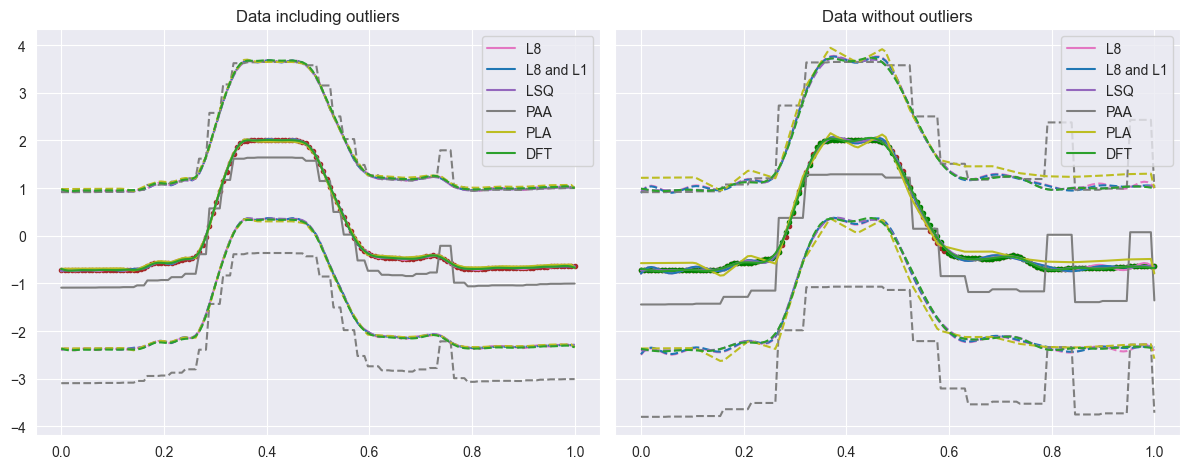

GunPointMaleVersusFemale no. 16, 11.9% processed
n_outliers 8
num_outliers_removed 0
        method   max_dist        MSE        MAE
138         L8 1.88253219 1.61259872 1.18703801
139  L8 and L1 1.88253229 1.60287453 1.18403740
140        LSQ 1.87747225 1.60220854 1.18413224
141        PAA 1.90969737 1.95433056 1.31682655
142        PLA 1.82118061 1.51756902 1.14848028
143        DFT 1.87355927 1.60212312 1.18424215


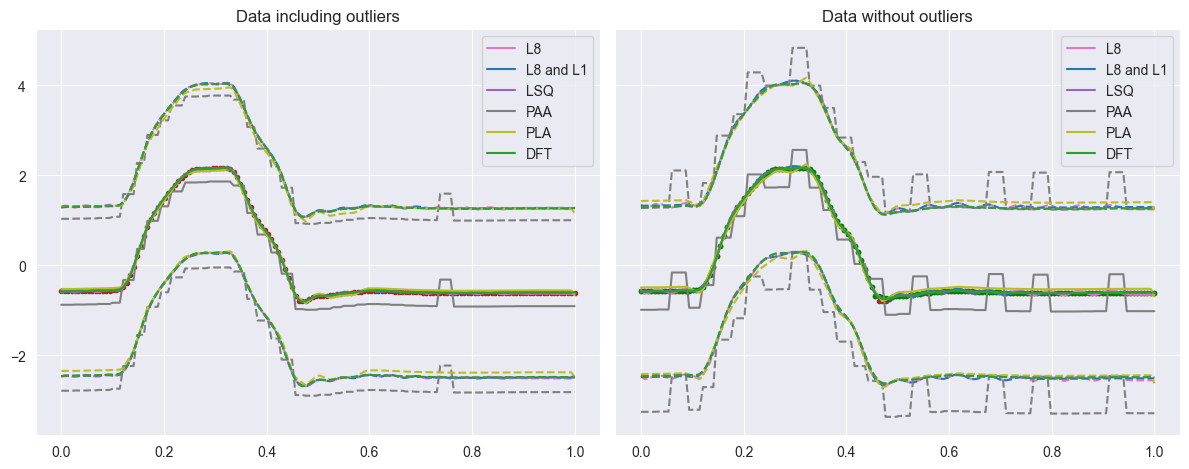

GunPointMaleVersusFemale no. 17, 12.6% processed
n_outliers 7
num_outliers_removed 0
        method   max_dist        MSE        MAE
144         L8 1.93277521 1.62343927 1.18829167
145  L8 and L1 1.93392633 1.60938483 1.18340215
146        LSQ 1.93147278 1.60987145 1.18352273
147        PAA 1.96616646 2.04248406 1.33274046
148        PLA 1.90676658 1.53047194 1.15413102
149        DFT 1.93108783 1.61009811 1.18347254


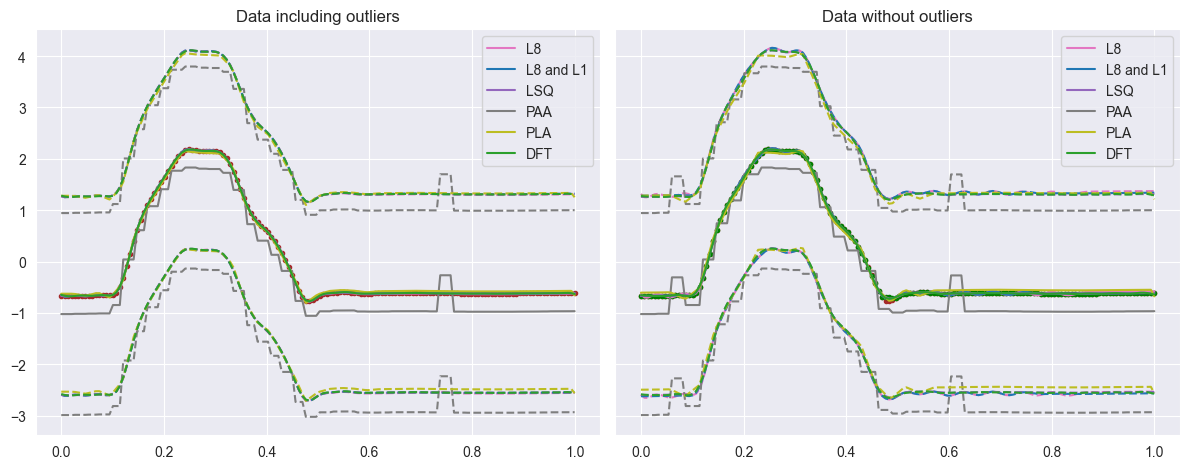

GunPointMaleVersusFemale no. 18, 13.3% processed
n_outliers 23
num_outliers_removed 0
        method   max_dist        MSE        MAE
150         L8 1.74874884 1.54836613 1.15901446
151  L8 and L1 1.74874894 1.48646996 1.14043593
152        LSQ 1.66620390 1.47821584 1.13658838
153        PAA 1.91891898 1.79230072 1.25757306
154        PLA 1.77825402 1.23103926 1.03034664
155        DFT 1.65006673 1.47867538 1.13800611
num_outliers_removed 23
        method   max_dist        MSE        MAE
156         L8 1.70778844 1.62572873 1.20944552
157  L8 and L1 1.70778854 1.62346613 1.20815017
158        LSQ 1.63694435 1.61932303 1.20679226
159        PAA 2.20617226 2.16899041 1.39113382
160        PLA 1.78402047 1.36165163 1.09352791
161        DFT 1.62737036 1.62668436 1.21149268


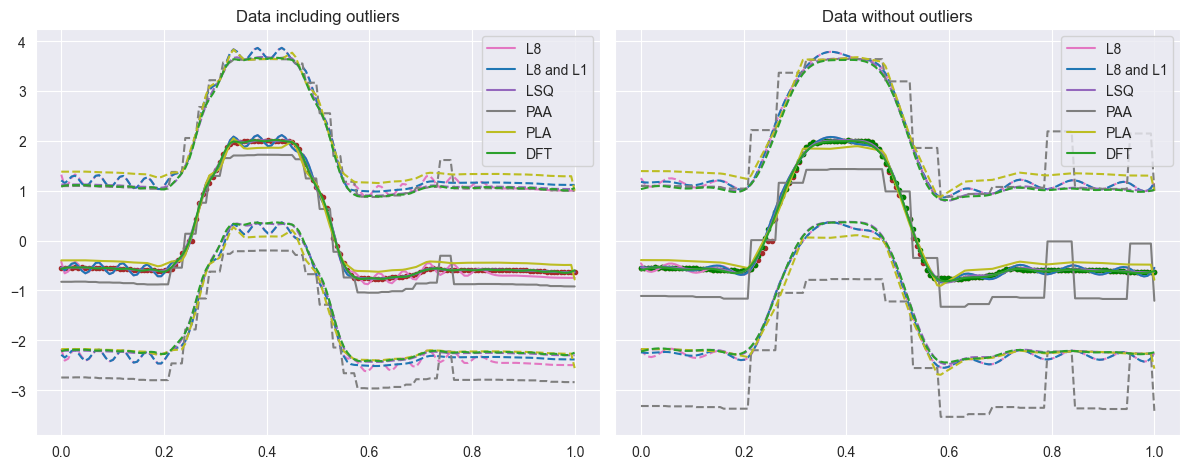

GunPointMaleVersusFemale no. 19, 14.1% processed
n_outliers 27
num_outliers_removed 0
        method   max_dist        MSE        MAE
162         L8 1.70258151 1.38958652 1.10823692
163  L8 and L1 1.68118006 1.37302841 1.10275246
164        LSQ 1.68096963 1.37328141 1.10256201
165        PAA 1.98456807 1.71409985 1.23181116
166        PLA 1.71665420 1.32321492 1.08124579
167        DFT 1.70842708 1.37366004 1.10257070


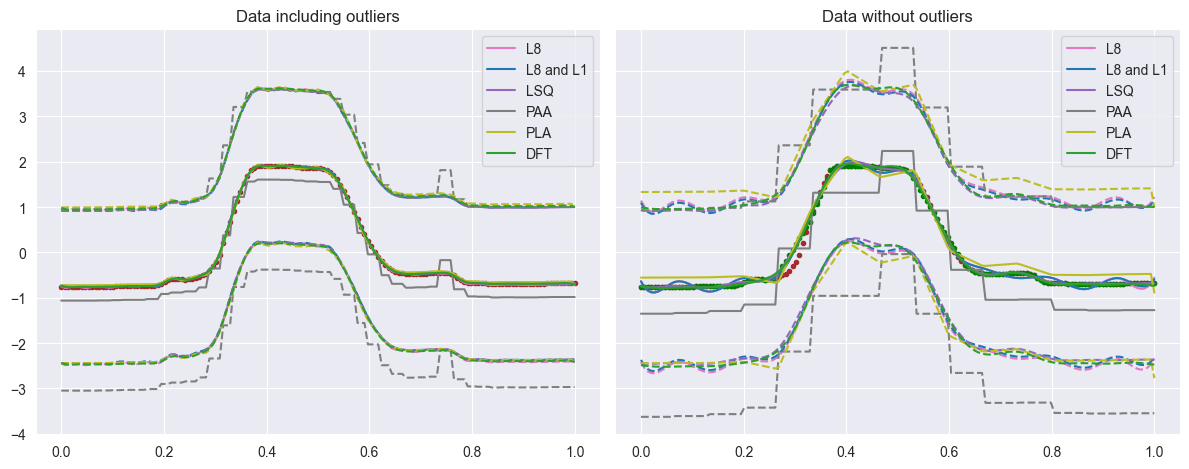

GunPointMaleVersusFemale no. 20, 14.8% processed
n_outliers 5
num_outliers_removed 0
        method   max_dist        MSE        MAE
168         L8 1.88973641 1.61354010 1.19098546
169  L8 and L1 1.89204306 1.60664581 1.18799166
170        LSQ 1.89332014 1.60704517 1.18817467
171        PAA 1.90245598 1.96955450 1.32600840
172        PLA 1.88264167 1.55523112 1.16851473
173        DFT 1.89450666 1.60699745 1.18814590


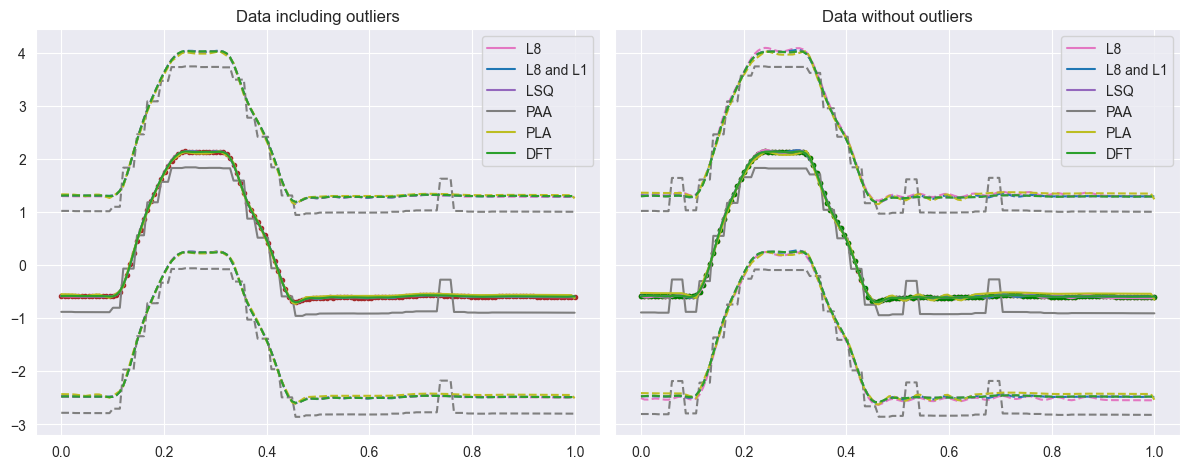

GunPointMaleVersusFemale no. 21, 15.6% processed
n_outliers 24
num_outliers_removed 0
        method   max_dist        MSE        MAE
174         L8 1.85124413 1.54033927 1.13724144
175  L8 and L1 1.85124423 1.52540935 1.13225536
176        LSQ 1.84908403 1.52530152 1.13180685
177        PAA 2.00335126 1.94640974 1.31107097
178        PLA 1.86168771 1.47985683 1.11274131
179        DFT 1.84278829 1.52511135 1.13195802


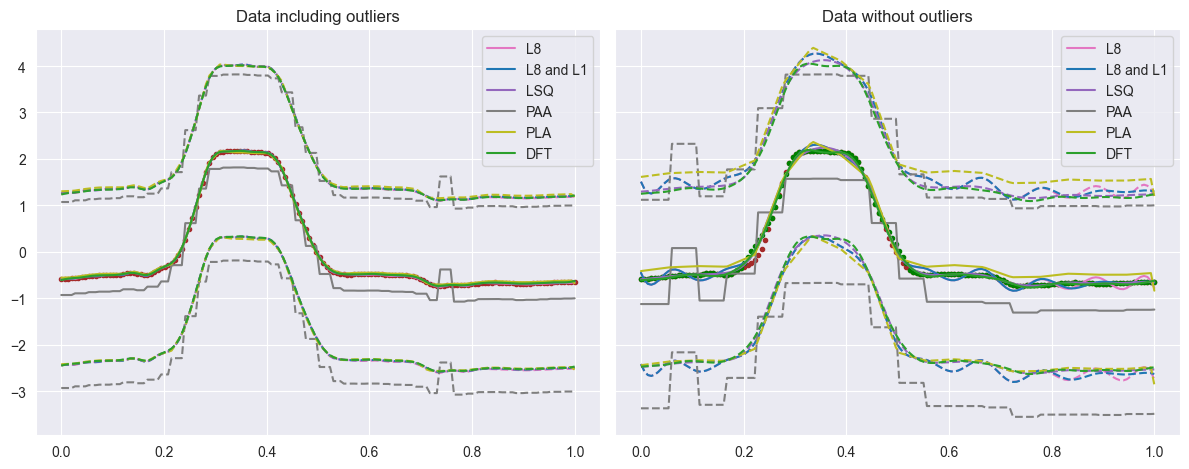

GunPointMaleVersusFemale no. 22, 16.3% processed
n_outliers 24
num_outliers_removed 0
        method   max_dist        MSE        MAE
180         L8 2.16231322 1.90864228 1.23187451
181  L8 and L1 1.94351267 1.51439978 1.10964733
182        LSQ 1.84696424 1.48132448 1.10113754
183        PAA 2.41325343 2.22018278 1.36386920
184        PLA 2.20214292 0.92139556 0.84725922
185        DFT 1.84355120 1.48511364 1.10192215
num_outliers_removed 24
        method   max_dist        MSE        MAE
186         L8 1.94579423 1.65441125 1.18261044
187  L8 and L1 1.84106212 1.65637550 1.18385632
188        LSQ 1.84418524 1.62631264 1.17542319
189        PAA 2.56843723 2.81808440 1.53131005
190        PLA 1.99088753 1.49913484 1.12080716
191        DFT 1.82866233 1.63703857 1.17240611


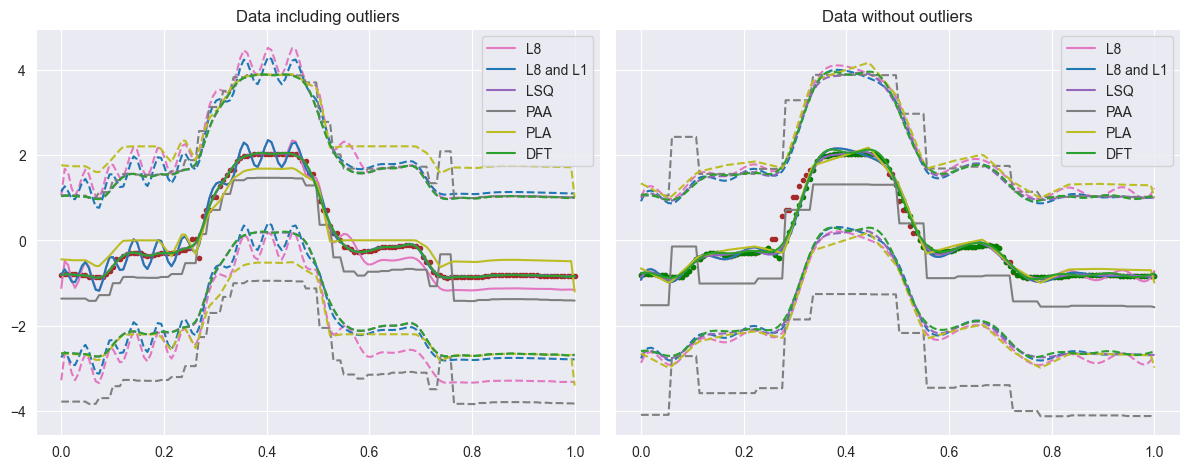

GunPointMaleVersusFemale no. 23, 17.0% processed
n_outliers 11
num_outliers_removed 0
        method   max_dist        MSE        MAE
192         L8 1.80827114 1.56805438 1.18149041
193  L8 and L1 1.80991528 1.56433007 1.17976449
194        LSQ 1.80387478 1.56401717 1.17966630
195        PAA 1.82543731 1.84043111 1.28515058
196        PLA 1.79859384 1.52200662 1.16313384
197        DFT 1.80691122 1.56478929 1.17982261


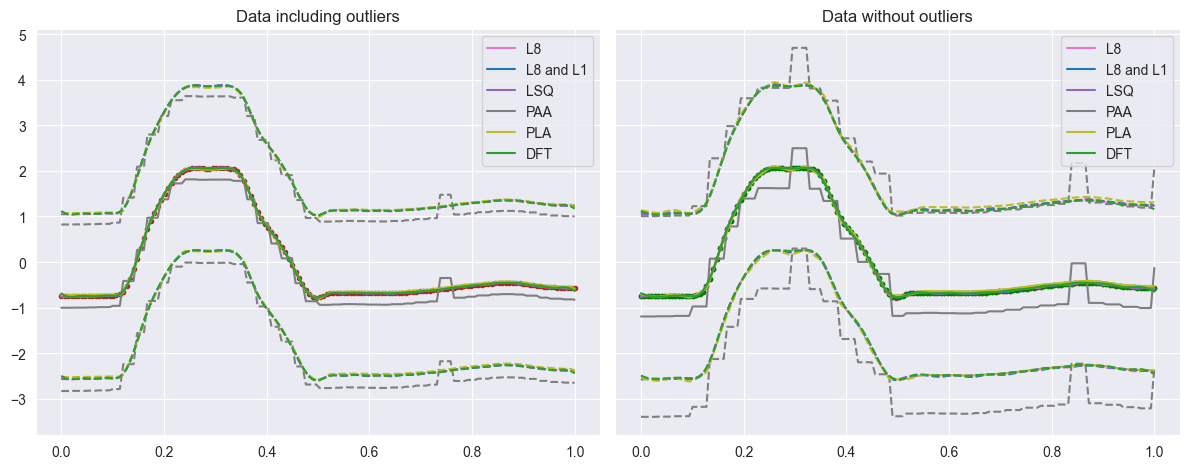

GunPointMaleVersusFemale no. 24, 17.8% processed
n_outliers 18
num_outliers_removed 0
        method   max_dist        MSE        MAE
198         L8 1.93768793 1.65445032 1.20797396
199  L8 and L1 1.93470946 1.64939358 1.20627831
200        LSQ 1.93982110 1.64968457 1.20640370
201        PAA 1.83974187 1.98536988 1.33486211
202        PLA 1.92208319 1.60073724 1.18717784
203        DFT 1.94068157 1.65015118 1.20651347


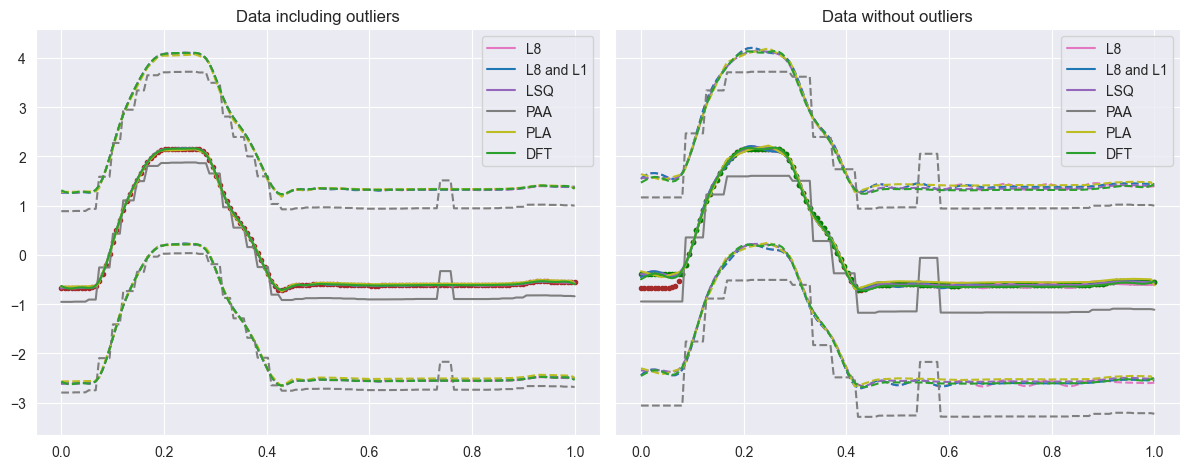

GunPointMaleVersusFemale no. 25, 18.5% processed
n_outliers 7
num_outliers_removed 0
        method   max_dist        MSE        MAE
204         L8 1.89395572 1.62893910 1.19365497
205  L8 and L1 1.89395582 1.62458043 1.19205665
206        LSQ 1.88028730 1.62335708 1.19170300
207        PAA 1.95862264 2.02593475 1.33218034
208        PLA 1.86158112 1.55390444 1.16542962
209        DFT 1.88121971 1.62313874 1.19173299


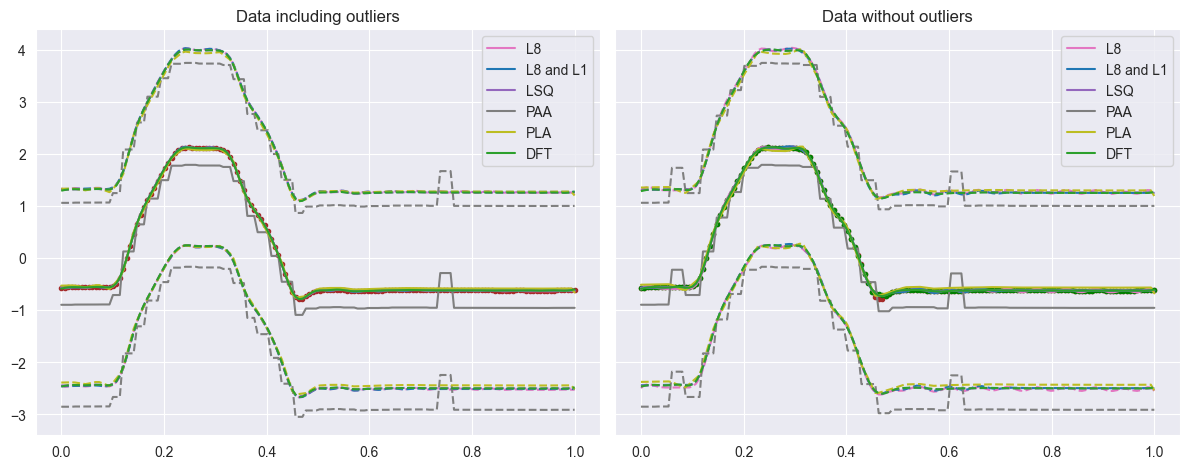

GunPointMaleVersusFemale no. 26, 19.3% processed
n_outliers 7
num_outliers_removed 0
        method   max_dist        MSE        MAE
210         L8 1.93147982 1.61886705 1.19163298
211  L8 and L1 1.93147972 1.61295022 1.18975878
212        LSQ 1.93640674 1.61280168 1.18971815
213        PAA 1.89257861 1.96839860 1.32741775
214        PLA 1.94843121 1.57787644 1.17570694
215        DFT 1.94021265 1.61263744 1.18974427


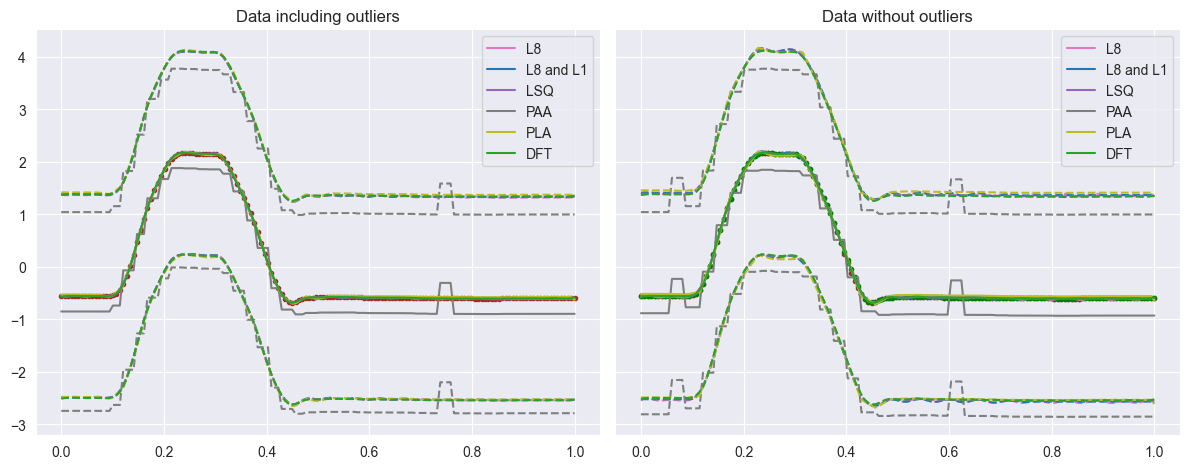

GunPointMaleVersusFemale no. 27, 20.0% processed
n_outliers 23
num_outliers_removed 0
        method   max_dist        MSE        MAE
216         L8 1.64830302 1.32298975 1.06646666
217  L8 and L1 1.63183977 1.30873487 1.06167750
218        LSQ 1.63121299 1.30844792 1.06170656
219        PAA 1.96404477 1.66874197 1.19549682
220        PLA 1.68495891 1.22278931 1.02242321
221        DFT 1.62414628 1.30840704 1.06172850


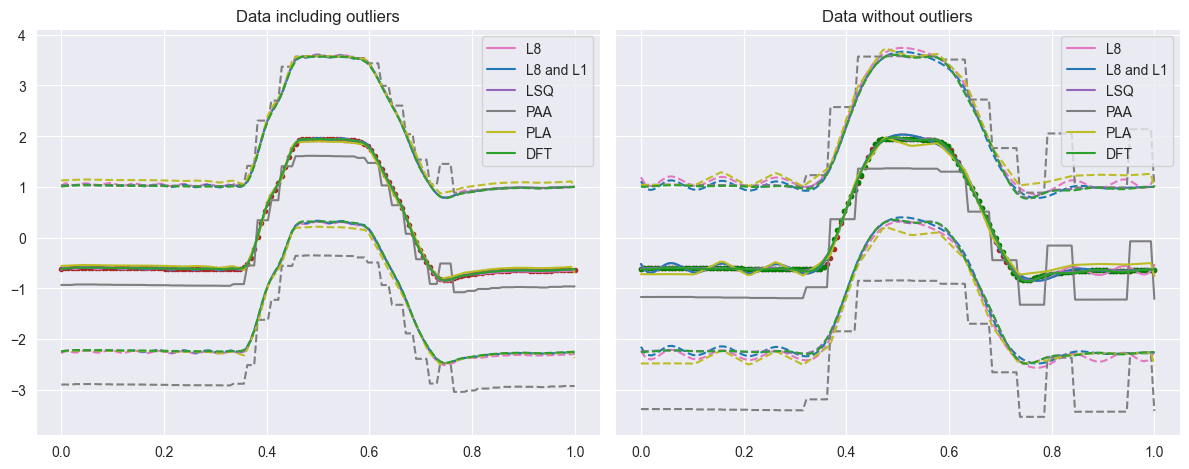

GunPointMaleVersusFemale no. 28, 20.7% processed
n_outliers 13
num_outliers_removed 0
        method   max_dist        MSE        MAE
222         L8 1.95946028 1.51482209 1.09651086
223  L8 and L1 1.95946038 1.51783128 1.09750407
224        LSQ 1.95386426 1.51721131 1.09733825
225        PAA 2.21984762 1.81102149 1.21916500
226        PLA 1.97828193 1.49332160 1.08658599
227        DFT 1.94818671 1.51681130 1.09739918


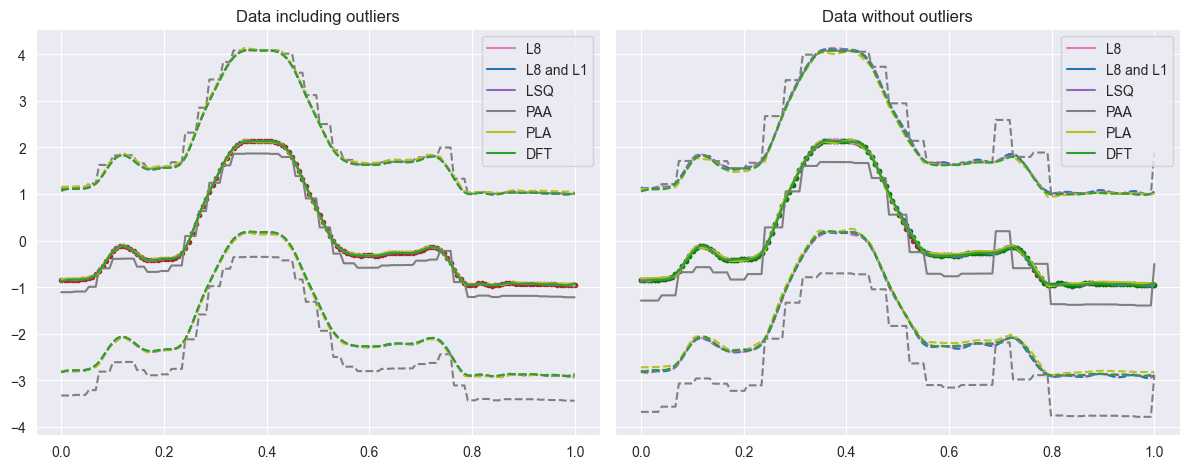

GunPointMaleVersusFemale no. 29, 21.5% processed
n_outliers 10
num_outliers_removed 0
        method   max_dist        MSE        MAE
228         L8 1.82739132 1.45731328 1.12064054
229  L8 and L1 1.82739142 1.46103759 1.12236909
230        LSQ 1.81873641 1.46201852 1.12251601
231        PAA 1.94238600 1.84713057 1.28166311
232        PLA 1.79898025 1.36406926 1.08082838
233        DFT 1.81656249 1.46176114 1.12290312


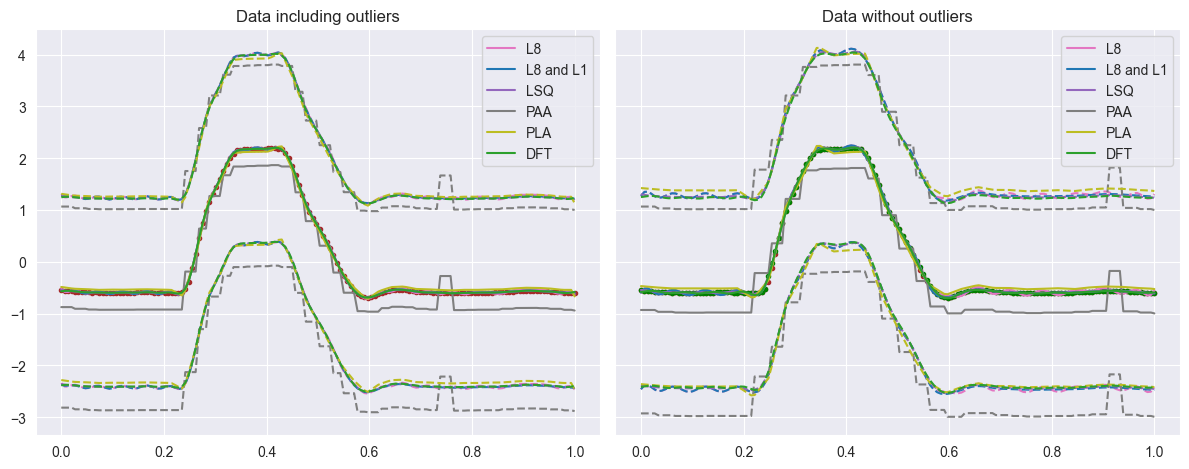

GunPointMaleVersusFemale no. 30, 22.2% processed
n_outliers 31
num_outliers_removed 0
        method   max_dist        MSE        MAE
234         L8 1.95639547 1.43233717 1.07207837
235  L8 and L1 1.94225486 1.42774094 1.07117339
236        LSQ 1.94259867 1.42667884 1.07080660
237        PAA 2.24868542 1.75737670 1.20807293
238        PLA 1.97262124 1.38851184 1.05486603
239        DFT 1.94178539 1.42669518 1.07091236


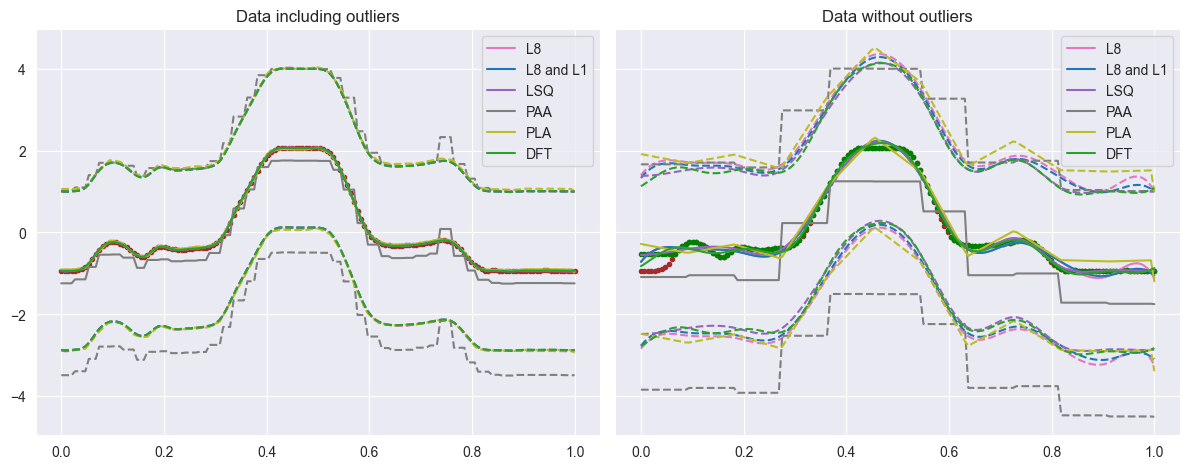

GunPointMaleVersusFemale no. 31, 23.0% processed
n_outliers 32
num_outliers_removed 0
        method   max_dist        MSE        MAE
240         L8 1.88720984 1.49880011 1.09867075
241  L8 and L1 1.88395211 1.49829840 1.09773190
242        LSQ 1.88396412 1.49878432 1.09802159
243        PAA 2.19087699 1.83545677 1.23870551
244        PLA 1.91159836 1.46268038 1.08327083
245        DFT 1.87287339 1.49864290 1.09804616


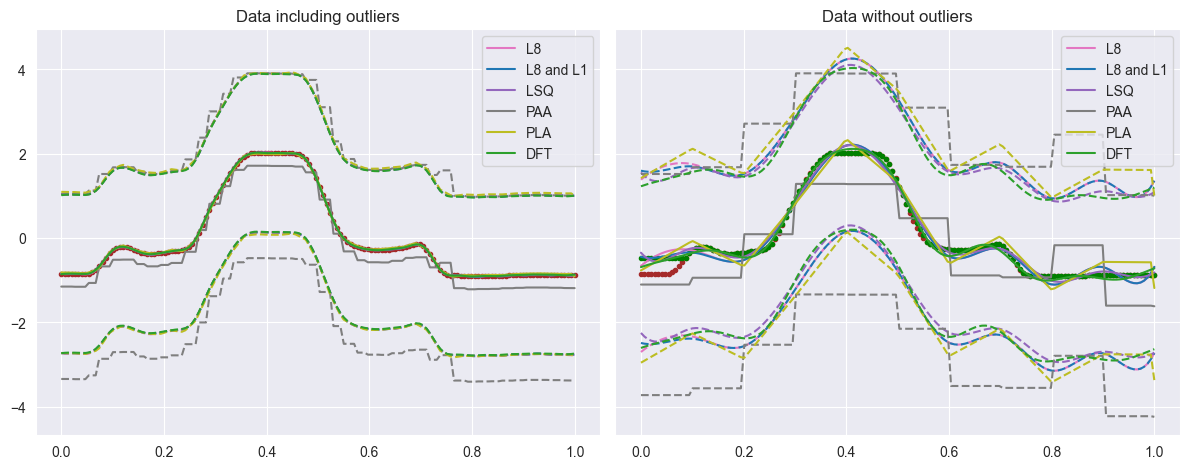

GunPointMaleVersusFemale no. 32, 23.7% processed
n_outliers 10
num_outliers_removed 0
        method   max_dist        MSE        MAE
246         L8 1.83652020 1.58652347 1.18062688
247  L8 and L1 1.83593381 1.58050510 1.17872814
248        LSQ 1.83048781 1.58031128 1.17864718
249        PAA 1.85212335 1.84827490 1.28051000
250        PLA 1.81082778 1.52583138 1.15624804
251        DFT 1.82653155 1.58049005 1.17881974


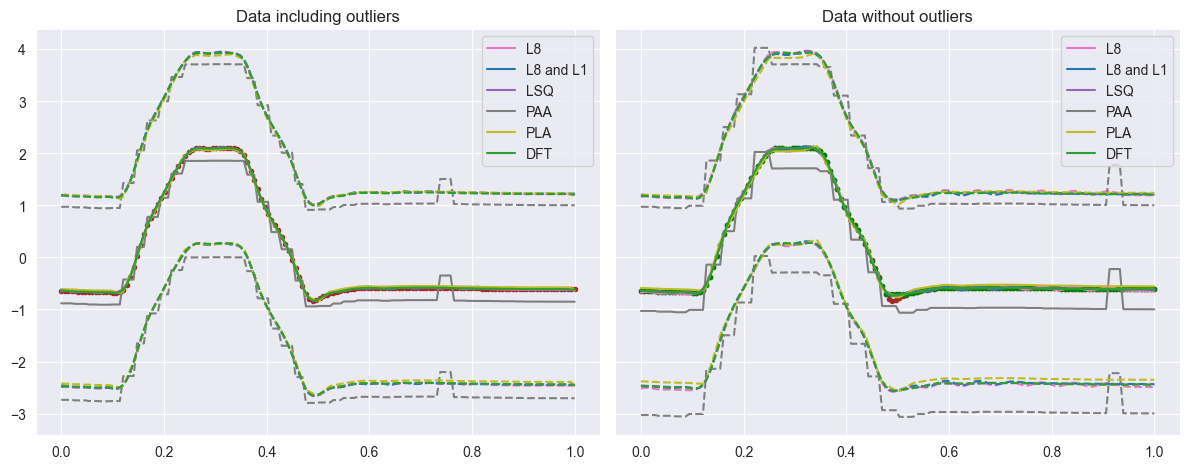

GunPointMaleVersusFemale no. 33, 24.4% processed
n_outliers 11
num_outliers_removed 0
        method   max_dist        MSE        MAE
252         L8 2.10622079 1.77517432 1.17156583
253  L8 and L1 1.99473952 1.47902748 1.09152410
254        LSQ 1.79302377 1.45991618 1.08951856
255        PAA 2.54342061 2.53836758 1.43726843
256        PLA 2.14903169 0.93970184 0.86614983
257        DFT 1.78987952 1.46292839 1.08978394
num_outliers_removed 11
        method   max_dist        MSE        MAE
258         L8 1.94860929 1.65341919 1.16818683
259  L8 and L1 1.82218965 1.54649972 1.13367270
260        LSQ 1.79348421 1.53839491 1.13419552
261        PAA 2.66583125 3.00910960 1.58038468
262        PLA 1.72392139 1.30806923 1.03890090
263        DFT 1.79874580 1.54129552 1.13258498


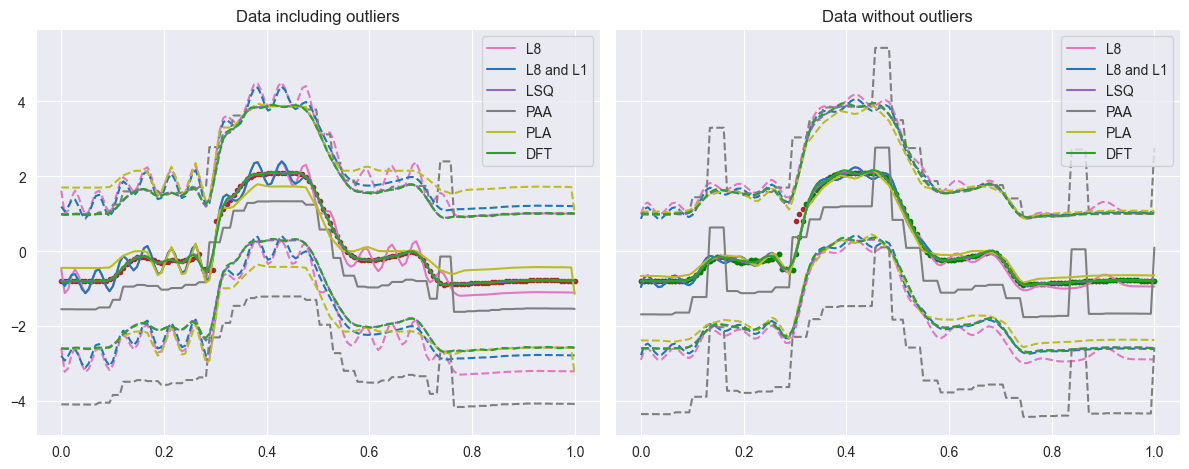

GunPointMaleVersusFemale no. 34, 25.2% processed
n_outliers 18
num_outliers_removed 0
        method   max_dist        MSE        MAE
264         L8 1.90937898 1.46379877 1.10668960
265  L8 and L1 1.90937908 1.41644169 1.09448291
266        LSQ 1.82510777 1.41662460 1.09322997
267        PAA 2.07003969 1.96943515 1.32280012
268        PLA 1.91018372 1.23644132 1.01360444
269        DFT 1.81324918 1.41677081 1.09346117
num_outliers_removed 18
        method   max_dist        MSE        MAE
270         L8 1.87874770 1.56087080 1.16703434
271  L8 and L1 1.87874780 1.54474527 1.16217863
272        LSQ 1.87448434 1.54656230 1.16350503
273        PAA 2.27014756 2.61252756 1.54332966
274        PLA 1.85794360 1.39389009 1.09847149
275        DFT 1.87173792 1.55194643 1.16661925


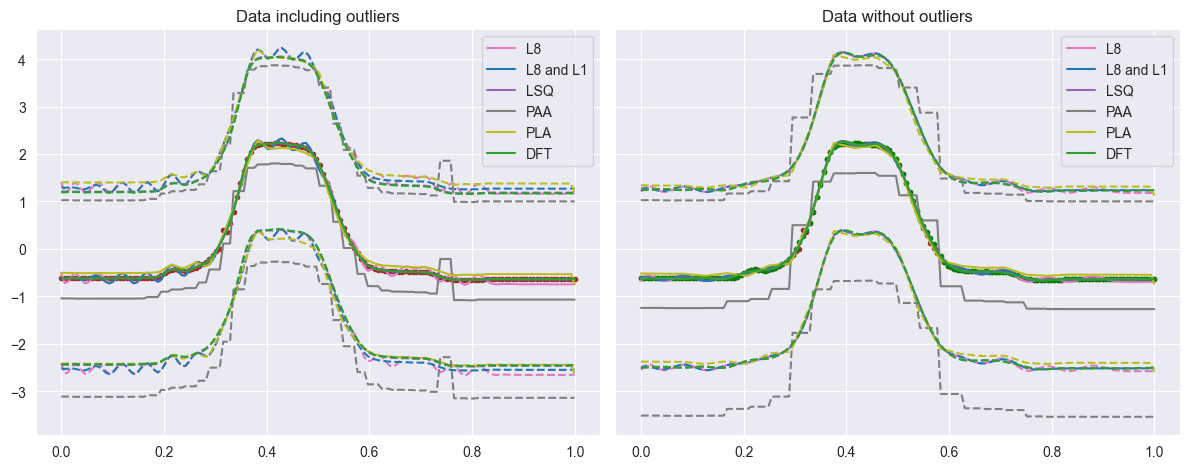

GunPointMaleVersusFemale no. 35, 25.9% processed
n_outliers 15
num_outliers_removed 0
        method   max_dist        MSE        MAE
276         L8 2.18002335 1.68861355 1.17297773
277  L8 and L1 1.95083242 1.44456302 1.10871237
278        LSQ 1.74122424 1.37605449 1.09546458
279        PAA 2.70119123 3.02087544 1.52823941
280        PLA 2.23472859 0.71343602 0.76155114
281        DFT 1.79836284 1.38804440 1.09871845
num_outliers_removed 15
        method   max_dist        MSE        MAE
282         L8 1.96638601 1.42690254 1.11207477
283  L8 and L1 1.96341753 1.41856595 1.10993720
284        LSQ 1.74206903 1.42532123 1.12073702
285        PAA 2.41839962 2.00223782 1.33828737
286        PLA 2.07064120 1.01316636 0.91437146
287        DFT 1.75432883 1.46588235 1.12170857


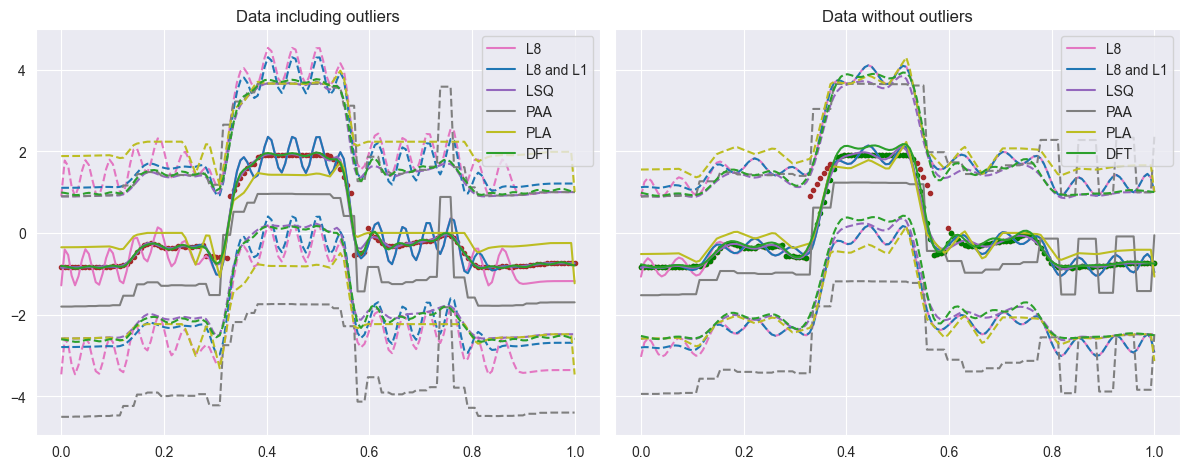

GunPointMaleVersusFemale no. 36, 26.7% processed
n_outliers 8
num_outliers_removed 0
        method   max_dist        MSE        MAE
288         L8 1.88834476 1.60875505 1.18256409
289  L8 and L1 1.88835327 1.60194588 1.18018928
290        LSQ 1.89057462 1.60159473 1.18009346
291        PAA 1.86907224 1.88193285 1.28640247
292        PLA 1.88589810 1.56601800 1.16564918
293        DFT 1.89048919 1.60149186 1.18012801
num_outliers_removed 8
        method   max_dist        MSE        MAE
294         L8 1.86592951 1.65758324 1.20217096
295  L8 and L1 1.89051192 1.64346019 1.19772178
296        LSQ 1.89388883 1.64290062 1.19750479
297        PAA 2.19055130 1.95096077 1.28770796
298        PLA 1.91809717 1.58241083 1.17303708
299        DFT 1.89574161 1.64664935 1.19928819


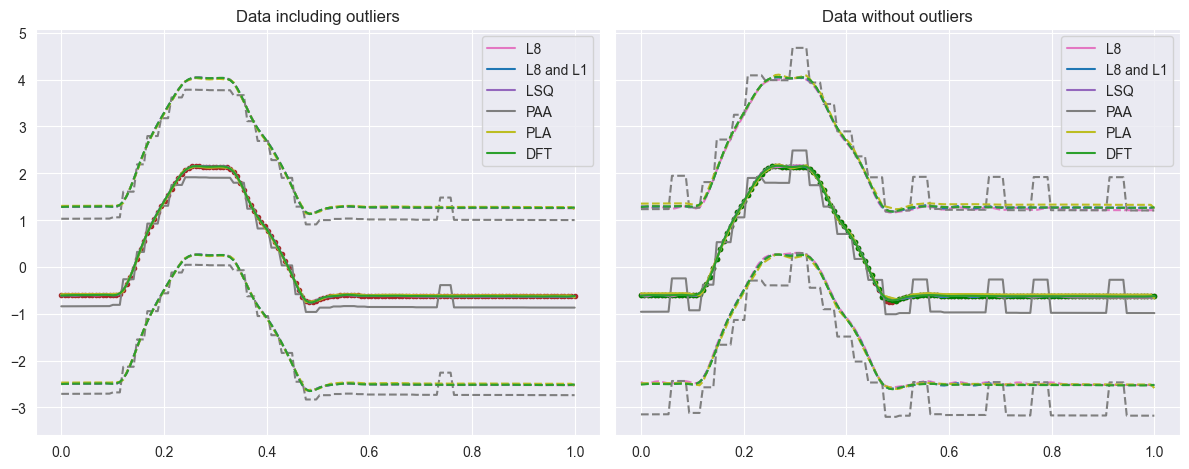

GunPointMaleVersusFemale no. 37, 27.4% processed
n_outliers 22
num_outliers_removed 0
        method   max_dist        MSE        MAE
300         L8 2.19762339 1.43664741 1.06919496
301  L8 and L1 2.19762349 1.43374366 1.06812206
302        LSQ 2.17510145 1.43393362 1.06825789
303        PAA 1.94093141 1.91410905 1.30005390
304        PLA 2.21418327 1.38462153 1.04425195
305        DFT 2.18057340 1.43462330 1.06844766


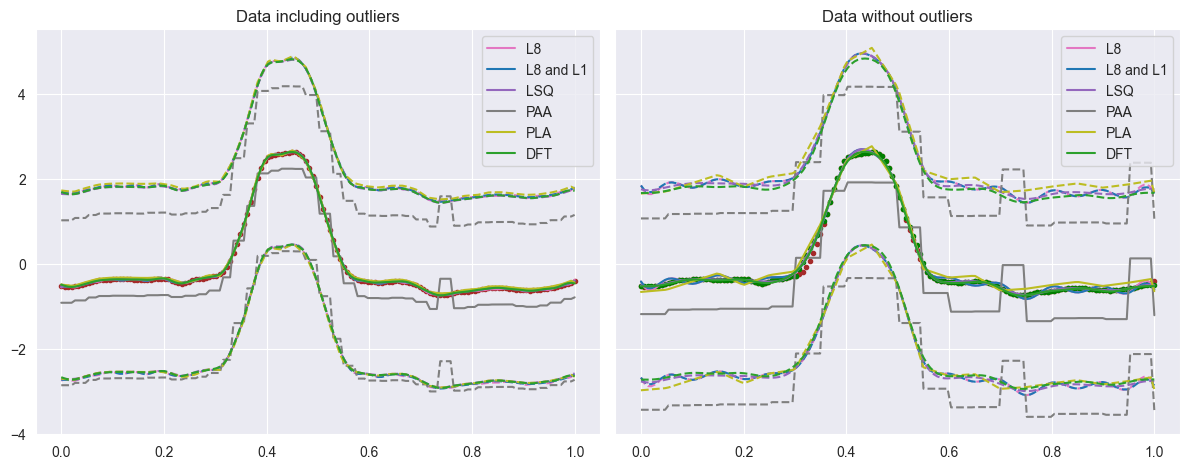

GunPointMaleVersusFemale no. 38, 28.1% processed
n_outliers 20
num_outliers_removed 0
        method   max_dist        MSE        MAE
306         L8 2.10015961 1.52194291 1.11109836
307  L8 and L1 1.85658649 1.50748925 1.11533418
308        LSQ 1.82769172 1.48663844 1.10993809
309        PAA 2.57202277 2.59374178 1.45031981
310        PLA 2.12384901 1.01360265 0.88951653
311        DFT 1.83140737 1.48981856 1.11077796
num_outliers_removed 20
        method   max_dist        MSE        MAE
312         L8 1.90476762 1.59763202 1.16027887
313  L8 and L1 1.82767559 1.58459039 1.15846959
314        LSQ 1.82846137 1.58530000 1.15914687
315        PAA 2.58658062 2.53077362 1.48288386
316        PLA 1.95666583 1.41794598 1.09263624
317        DFT 1.84111688 1.61305624 1.16266595


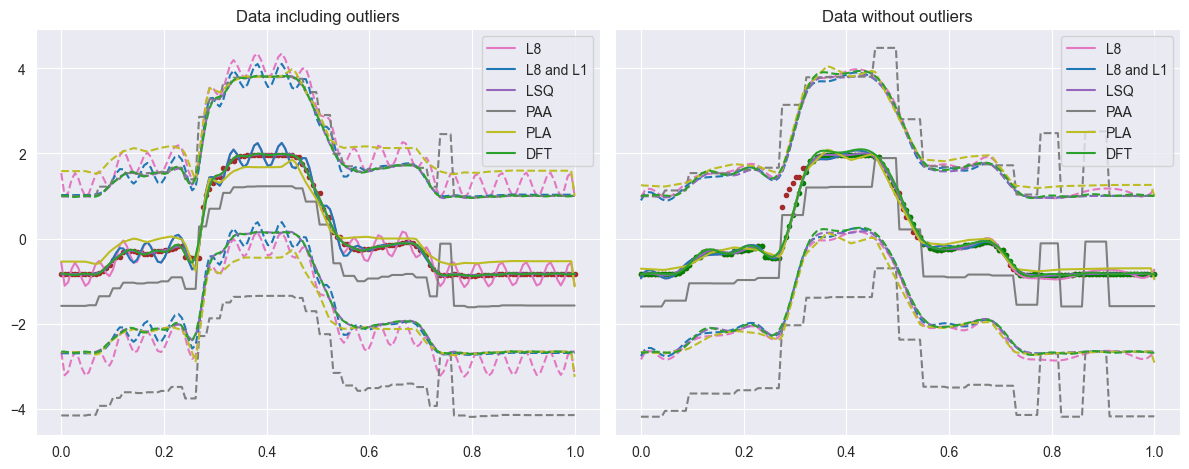

GunPointMaleVersusFemale no. 39, 28.9% processed
n_outliers 22
num_outliers_removed 0
        method   max_dist        MSE        MAE
318         L8 2.27513668 1.99482659 1.25371208
319  L8 and L1 1.89152425 1.50907238 1.11115375
320        LSQ 1.86741958 1.45030187 1.10349827
321        PAA 2.75122710 2.92094913 1.50284535
322        PLA 2.32320677 0.77635406 0.76791082
323        DFT 1.86051122 1.45506929 1.10584012
num_outliers_removed 22
        method   max_dist        MSE        MAE
324         L8 2.00110525 1.58027855 1.16429423
325  L8 and L1 1.87196192 1.57267964 1.16259404
326        LSQ 1.87198524 1.56905822 1.16464220
327        PAA 2.75291067 2.70636827 1.46165073
328        PLA 2.07997104 1.24237702 1.02206644
329        DFT 1.86367097 1.58571514 1.16557673


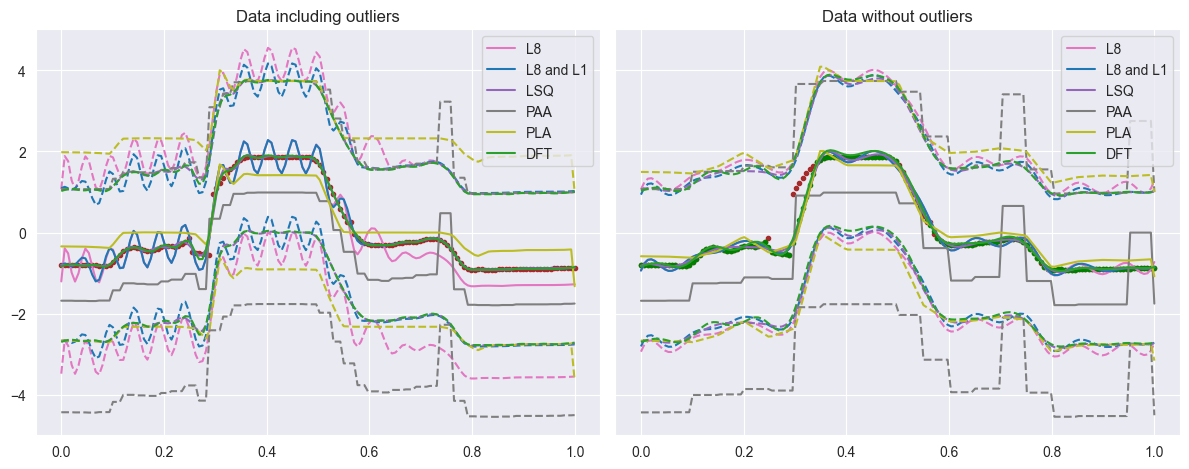

GunPointMaleVersusFemale no. 40, 29.6% processed
n_outliers 21


KeyboardInterrupt: 

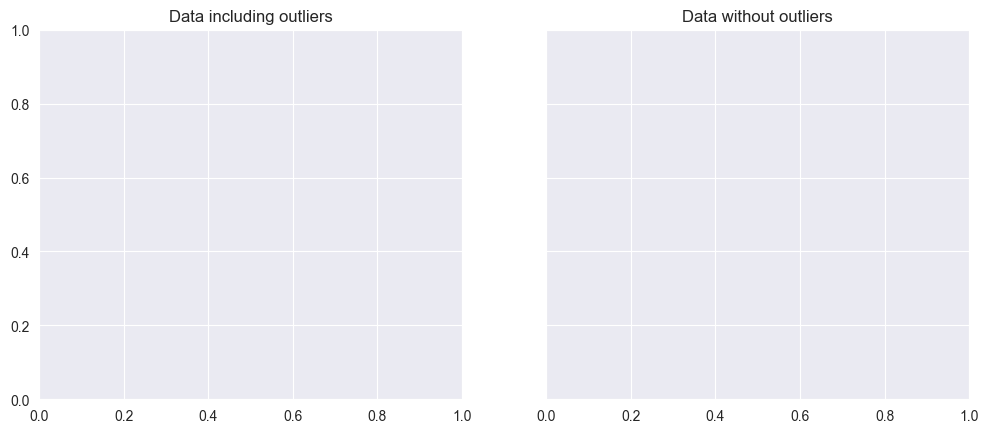

In [42]:
%%time
import matplotlib.pyplot as plt
from tsfel import mean_diff
from utils.data import remove_outliers, replace_outliers
from utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count
from utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utils.spline import evaluate_spline
import pandas as pd

results = []
num_rows = len(data.index)
ts_properties = []
worse_without_outliers_counter = 0

for idx, row in data.iterrows():
    original_time_series = row['data']
    time_series_without_outliers = remove_outliers(row['data'])

    n_outliers = len(original_time_series) - len(time_series_without_outliers)

    print(f"{row['dataset']} no. {row['num']}, {round(idx / num_rows * 100, 1)}% processed")
    print("n_outliers", n_outliers)

    f, axes = plt.subplots(1, 2, sharey=True)
    f.set_figwidth(12)

    axes[0].set_title("Data including outliers")
    axes[1].set_title("Data without outliers")

    ts_list = [(original_time_series, 0)]
    if n_outliers > 0:
        time_series_with_replaced_outliers = replace_outliers(time_series_without_outliers,
                                                              [tup[0] for tup in original_time_series])
        ts_list.append((time_series_with_replaced_outliers, n_outliers))

    max_dist_with_outliers = None
    max_dist_without_outliers = None

    for ts, num_outliers_removed in ts_list:

        ts_properties.append({
            'dataset': row['dataset'],
            'num': row['num'],
            'num_data_pts': len(ts),
            'num_outliers_removed': num_outliers_removed,
            'mean_diff': mean_diff(ts),
            'max_fst_derivative': max(pd.Series([tup[0] for tup in ts]).diff().dropna()),
            'max_snd_derivative': max(pd.Series([tup[0] for tup in ts]).diff().diff().dropna()),
            'avg_fst_derivative': pd.Series([tup[0] for tup in ts]).diff().dropna().mean(),
            'avg_snd_derivative': pd.Series([tup[0] for tup in ts]).diff().diff().dropna().mean()
        })

        min_num_coeffs = degree + 1
        num_coeffs_count = generate_coeff_counts(len(original_time_series), degree, [compression_rate])[0]
        num_coeffs = max(min_num_coeffs, num_coeffs_count - num_outliers_removed)
        if num_coeffs_count - num_outliers_removed < min_num_coeffs:
            print("num_coeffs_count is",
                  num_coeffs_count - num_outliers_removed,
                  "but required is at least", min_num_coeffs)
            print("setting num_coeffs to", num_coeffs)
        knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)

        for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
            plot_method = False
            axis = None
            metrics = None

            if num_outliers_removed > 0:
                axis = axes[1]
            else:
                axis = axes[0]

            fitted_curve = fit_curve_to_data(method, ts, knots, num_coeffs, degree)
            
            if num_outliers_removed == 0:
                metrics = calculate_error_measures(data_points=[tup[0] for tup in ts], fitted_curve=fitted_curve)
                
            elif num_outliers_removed > 0:
                xs = [tup[0] for tup in time_series_without_outliers]
                indicators = [1 if tup[0] in set(xs) else 0 for tup in original_time_series]
                filtered_fitted_curve = [y for y, indicator in zip(fitted_curve, indicators) if indicator == 1]
                metrics = calculate_error_measures(data_points=xs, fitted_curve=filtered_fitted_curve)

            add_fitted_curve_to_plot(axis, [x[0] for x in ts], fitted_curve, metrics['max_dist'],label=method)

            if method == 'L8':
                if num_outliers_removed == 0:
                    max_dist_with_outliers = metrics['max_dist']
                elif num_outliers_removed > 0:
                    max_dist_without_outliers = metrics['max_dist']

            if (max_dist_with_outliers is not None) and (max_dist_without_outliers is not None):
                if max_dist_without_outliers >= max_dist_with_outliers:
                    worse_without_outliers_counter += 1
                    continue
            
            results.append({
                'dataset': row['dataset'],
                'num': row['num'],
                'num_data_pts': len(ts),
                'num_outliers_removed': num_outliers_removed if num_outliers_removed >= 0 else 0,
                'num_coeffs': num_coeffs,
                'method': method,
                'max_dist': metrics['max_dist'],
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE']
            })

        df = pd.DataFrame(results)
        current_df = df[(df['dataset'] == row['dataset']) & (df['num'] == row['num']) & (
                df['num_outliers_removed'] == num_outliers_removed)]
        if not current_df.empty:
            print("num_outliers_removed", num_outliers_removed)
            print(current_df.loc[:, ['method', 'max_dist', 'MSE', 'MAE']])

        if num_outliers_removed == 0:
            axis.scatter([d[0] for d in ts], [d[1] for d in ts], color="red", marker='.')
        elif num_outliers_removed > 0:
            axis.scatter([d[0] for d in original_time_series], [d[1] for d in original_time_series], color="brown",
                         marker='.')
            axis.scatter([d[0] for d in ts], [d[1] for d in ts], color="green", marker='.')

    plt.subplots_adjust(bottom=0.25, top=0.95)
    axes[0].legend(loc='upper right')
    axes[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [43]:
# OLD VERSION
"""%%time
from utils.data import impute_outliers
import matplotlib.pyplot as plt
from tsfel import mean_diff
from utils.data import remove_outliers, replace_outliers
from utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count
from utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utils.spline import evaluate_spline
import pandas as pd

results = []
num_rows = len(data.index)
ts_properties = []
worse_without_outliers_counter = 0

for idx, row in data.iterrows():
    original_time_series = row['data']
    #time_series_lof = remove_outliers(row['data'])

    n_outliers = len(original_time_series) - len(remove_outliers(row['data']))

    print(f"{row['dataset']} no. {row['num']}, {round(idx / num_rows * 100, 1)}% processed")
    print("n_outliers", n_outliers)

    f, axes = plt.subplots(1, 2, sharey=True)
    f.set_figwidth(12)

    axes[0].set_title("Data including outliers")
    axes[1].set_title("Data without outliers")

    ts_list = [(original_time_series, 0)]
    if n_outliers > 0:
        time_series_lof = impute_outliers(row['data'])
        ts_list.append((time_series_lof, n_outliers))

    max_dist_with_outliers = None
    max_dist_without_outliers = None

    for ts, num_outliers_removed in ts_list:

        ts_properties.append({
            'dataset': row['dataset'],
            'num': row['num'],
            'num_data_pts': len(ts),
            'num_outliers_removed': num_outliers_removed,
            'mean_diff': mean_diff(ts),
            'max_fst_derivative': max(pd.Series([tup[0] for tup in ts]).diff().dropna()),
            'max_snd_derivative': max(pd.Series([tup[0] for tup in ts]).diff().diff().dropna()),
            'avg_fst_derivative': pd.Series([tup[0] for tup in ts]).diff().dropna().mean(),
            'avg_snd_derivative': pd.Series([tup[0] for tup in ts]).diff().diff().dropna().mean()
        })

        min_num_coeffs = degree + 1
        num_coeffs_count = generate_coeff_counts(len(original_time_series), degree, [compression_rate])[0]
        num_coeffs = max(min_num_coeffs, num_coeffs_count - num_outliers_removed)
        if num_coeffs_count - num_outliers_removed < min_num_coeffs:
            print("num_coeffs_count is", num_coeffs_count - num_outliers_removed,
                  "but required is at least min_num_coeffs")
            print("setting num_coeffs to", num_coeffs)
        knots = generate_knot_vector_from_coeff_count(degree=degree, num_coeffs=num_coeffs)


        for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
            plot_method = False
            axis = None

            if method in ['L8']:  #['L8', 'L8 and L1', 'LSQ',  'PLA', 'DFT']: #['PAA']:#
                plot_method = True

            if num_outliers_removed > 0:
                axis = axes[1]
            else:
                axis = axes[0]

            metrics = fit_spline(method, ts, knots, num_coeffs, num_outliers_removed, plot=plot_method, axis=axis)

            if method == 'L8':
                if num_outliers_removed == 0:
                    max_dist_with_outliers = metrics['max_dist']
                elif num_outliers_removed > 0:
                    max_dist_without_outliers = metrics['max_dist']

            if (max_dist_with_outliers is not None) and (max_dist_without_outliers is not None):
                if max_dist_without_outliers >= max_dist_with_outliers:
                    worse_without_outliers_counter += 1
                    continue

            results.append({
                'dataset': row['dataset'],
                'num': row['num'],
                'num_data_pts': len(ts),
                'num_outliers_removed': num_outliers_removed if num_outliers_removed >= 0 else 0,
                'num_coeffs': num_coeffs,
                'method': method,
                'max_dist': metrics['max_dist'],
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE']
            })

        df = pd.DataFrame(results)
        current_df = df[(df['dataset'] == row['dataset']) & (df['num'] == row['num']) & (
                df['num_outliers_removed'] == num_outliers_removed)]
        if not current_df.empty:
            print("num_outliers_removed", num_outliers_removed)
            print(current_df.loc[:, ['method', 'max_dist', 'MSE', 'MAE']])

        if num_outliers_removed == 0:
            axis.scatter([d[0] for d in ts], [d[1] for d in ts], color="brown", marker='.')
        elif num_outliers_removed > 0:
            axis.scatter([d[0] for d in original_time_series], [d[1] for d in original_time_series], color="brown",
                         marker='.')
            axis.scatter([d[0] for d in ts], [d[1] for d in ts], color="green", marker='.')

    plt.subplots_adjust(bottom=0.25, top=0.95)
    axes[0].legend(loc='upper right')
    axes[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()"""

'%%time\nfrom utils.data import impute_outliers\nimport matplotlib.pyplot as plt\nfrom tsfel import mean_diff\nfrom utils.data import remove_outliers, replace_outliers\nfrom utils.spline import generate_coeff_counts, generate_knot_vector_from_coeff_count\nfrom utils.fit import fit_max_spline, fit_max_l1_spline, fit_DFT, calculate_inverse_DFT, fit_LSQ_spline\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nfrom utils.spline import evaluate_spline\nimport pandas as pd\n\nresults = []\nnum_rows = len(data.index)\nts_properties = []\nworse_without_outliers_counter = 0\n\nfor idx, row in data.iterrows():\n    original_time_series = row[\'data\']\n    #time_series_lof = remove_outliers(row[\'data\'])\n\n    n_outliers = len(original_time_series) - len(remove_outliers(row[\'data\']))\n\n    print(f"{row[\'dataset\']} no. {row[\'num\']}, {round(idx / num_rows * 100, 1)}% processed")\n    print("n_outliers", n_outliers)\n\n    f, axes = plt.subplots(1, 2, sharey=True)\n    

# EVALUATE RESULTS

In [44]:
import pandas as pd

pd.set_option('display.float_format', '{:.8f}'.format)

e2_results = pd.DataFrame(results).drop_duplicates()
mean_values = e2_results.groupby('method').agg({'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values

method   max_dist        MSE        MAE
0        DFT 1.80264769 1.51344468 1.14099708
1         L8 1.87928583 1.57091188 1.15771006
2  L8 and L1 1.82636477 1.51448767 1.14045531
3        LSQ 1.80025901 1.50840307 1.13966793
4        PAA 2.15184924 2.11432576 1.34044379
5        PLA 1.88795656 1.33156936 1.05963863

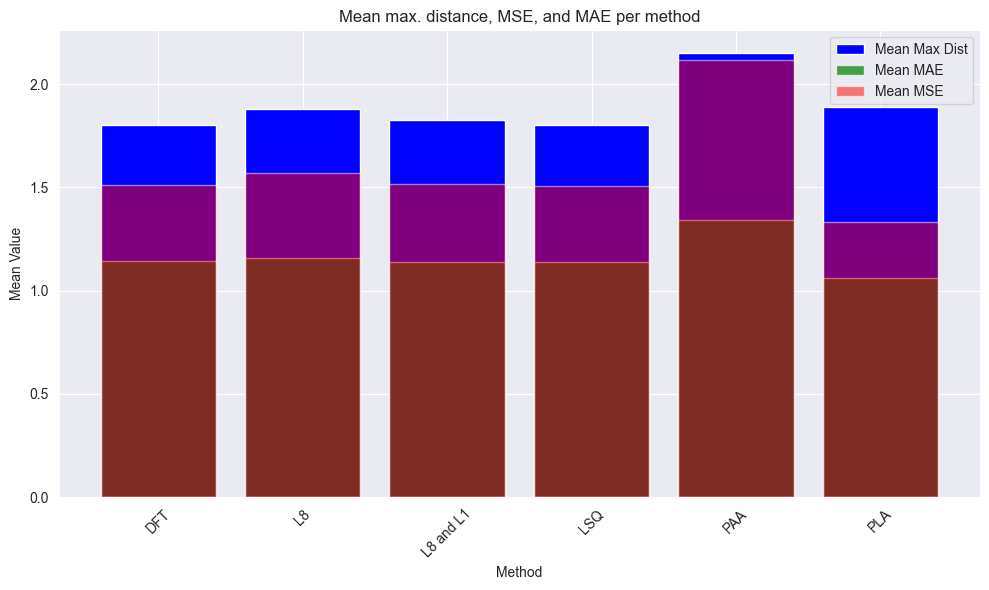

In [45]:
import matplotlib.pyplot as plt

# Plot mean values
plt.figure(figsize=(10, 6))

plt.bar(mean_values['method'], mean_values['max_dist'], color='b', label='Mean Max Dist')
plt.bar(mean_values['method'], mean_values['MAE'], alpha=0.7, color='g', label='Mean MAE')
plt.bar(mean_values['method'], mean_values['MSE'], alpha=0.5, color='r', label='Mean MSE')
plt.xlabel('Method')
plt.ylabel('Mean Value')
plt.title('Mean max. distance, MSE, and MAE per method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
"""
import pandas as pd
pd.set_option('display.float_format', '{:.8f}'.format)

# Calculate mean values for each accuracy measure separately
mean_max_dist = e2_results.groupby('method')['max_dist'].mean().reset_index()
mean_mse = e2_results.groupby('method')['MSE'].mean().reset_index()
mean_mae = e2_results.groupby('method')['MAE'].mean().reset_index()

# Merge the mean values into a single DataFrame
mean_values = mean_max_dist.merge(mean_mse, on='method').merge(mean_mae, on='method')
mean_values"""

"\nimport pandas as pd\npd.set_option('display.float_format', '{:.8f}'.format)\n\n# Calculate mean values for each accuracy measure separately\nmean_max_dist = e2_results.groupby('method')['max_dist'].mean().reset_index()\nmean_mse = e2_results.groupby('method')['MSE'].mean().reset_index()\nmean_mae = e2_results.groupby('method')['MAE'].mean().reset_index()\n\n# Merge the mean values into a single DataFrame\nmean_values = mean_max_dist.merge(mean_mse, on='method').merge(mean_mae, on='method')\nmean_values"

In [47]:
# combine results df with ts properties df for analysis later
ts_props = pd.DataFrame(ts_properties).drop_duplicates()
e2 = pd.merge(e2_results, ts_props, how='left', on=['dataset', 'num', 'num_data_pts', 'num_outliers_removed'])
e2

dataset  num  num_data_pts  num_outliers_removed  \
0    GunPointMaleVersusFemale    0           150                     0   
1    GunPointMaleVersusFemale    0           150                     0   
2    GunPointMaleVersusFemale    0           150                     0   
3    GunPointMaleVersusFemale    0           150                     0   
4    GunPointMaleVersusFemale    0           150                     0   
..                        ...  ...           ...                   ...   
325  GunPointMaleVersusFemale   39           150                    22   
326  GunPointMaleVersusFemale   39           150                    22   
327  GunPointMaleVersusFemale   39           150                    22   
328  GunPointMaleVersusFemale   39           150                    22   
329  GunPointMaleVersusFemale   39           150                    22   

     num_coeffs     method   max_dist        MSE        MAE   mean_diff  \
0            45         L8 1.68355739 1.41539340 1.10357943 -0.50000000   
1            45  L8 and L1 1.65155319 1.40396863 1.09991480 -0.50000000   
2            45        LSQ 1.65168176 1.40305680 1.09999635 -0.50000000   
3            45        PAA 1.91062984 1.66677285 1.19603772 -0.50000000   
4            45        PLA 1.70257934 1.32142973 1.06610153 -0.50000000   
..          ...        ...        ...        ...        ...         ...   
325          23  L8 and L1 1.87196192 1.57267964 1.16259404 -0.53410913   
326          23        LSQ 1.87198524 1.56905822 1.16464220 -0.53410913   
327          23        PAA 2.75291067 2.70636827 1.46165073 -0.53410913   
328          23        PLA 2.07997104 1.24237702 1.02206644 -0.53410913   
329          23        DFT 1.86367097 1.58571514 1.16557673 -0.53410913   

     max_fst_derivative  max_snd_derivative  avg_fst_derivative  \
0            0.00671141          0.00000000          0.00671141   
1            0.00671141          0.00000000          0.00671141   
2            0.00671141          0.00000000          0.00671141   
3            0.00671141          0.00000000          0.00671141   
4            0.00671141          0.00000000          0.00671141   
..                  ...                 ...                 ...   
325          0.00671141          0.00000000          0.00671141   
326          0.00671141          0.00000000          0.00671141   
327          0.00671141          0.00000000          0.00671141   
328          0.00671141          0.00000000          0.00671141   
329          0.00671141          0.00000000          0.00671141   

     avg_snd_derivative  
0           -0.00000000  
1           -0.00000000  
2           -0.00000000  
3           -0.00000000  
4           -0.00000000  
..                  ...  
325         -0.00000000  
326         -0.00000000  
327         -0.00000000  
328         -0.00000000  
329         -0.00000000  

[330 rows x 14 columns]

# comparison: outliers vs. no outliers (for each method)

In [48]:
df_no_outliers = e2[e2['num_outliers_removed'] > 0]
df_with_outliers = e2[e2['num_outliers_removed'] == 0]
#df_no_outliers = e2_results[e2_results['num_outliers_removed'] > 0]
#df_with_outliers = e2_results[e2_results['num_outliers_removed'] == 0]

mean_values_no_outliers = df_no_outliers.groupby('method').agg(
    {'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values_no_outliers.rename(columns={'max_dist': 'max_dist w/o o.', 'MSE': 'MSE w/o o.', 'MAE': 'MAE w/o o.'},
                               inplace=True)

mean_values_with_outliers = df_with_outliers.groupby('method').agg(
    {'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values_with_outliers.rename(columns={'max_dist': 'max_dist', 'MSE': 'MSE', 'MAE': 'MAE'}, inplace=True)

mean_values_combined = pd.merge(mean_values_with_outliers, mean_values_no_outliers, on='method', how='outer')
mean_values_combined

method   max_dist        MSE        MAE  max_dist w/o o.  MSE w/o o.  \
0        DFT 1.81524180 1.49662155 1.13174277       1.76906339  1.55830636   
1         L8 1.89575249 1.57552451 1.15491485       1.83537474  1.55861153   
2  L8 and L1 1.83932069 1.50277091 1.13261336       1.79181566  1.54573237   
3        LSQ 1.81310751 1.49568296 1.13138670       1.76599634  1.54232335   
4        PAA 2.07612097 2.00704081 1.30951971       2.35379128  2.40041895   
5        PLA 1.89804017 1.32250654 1.05219081       1.86106691  1.35573688   

   MAE w/o o.  
0  1.16567522  
1  1.16516397  
2  1.16136719  
3  1.16175122  
4  1.42290799  
5  1.07949947

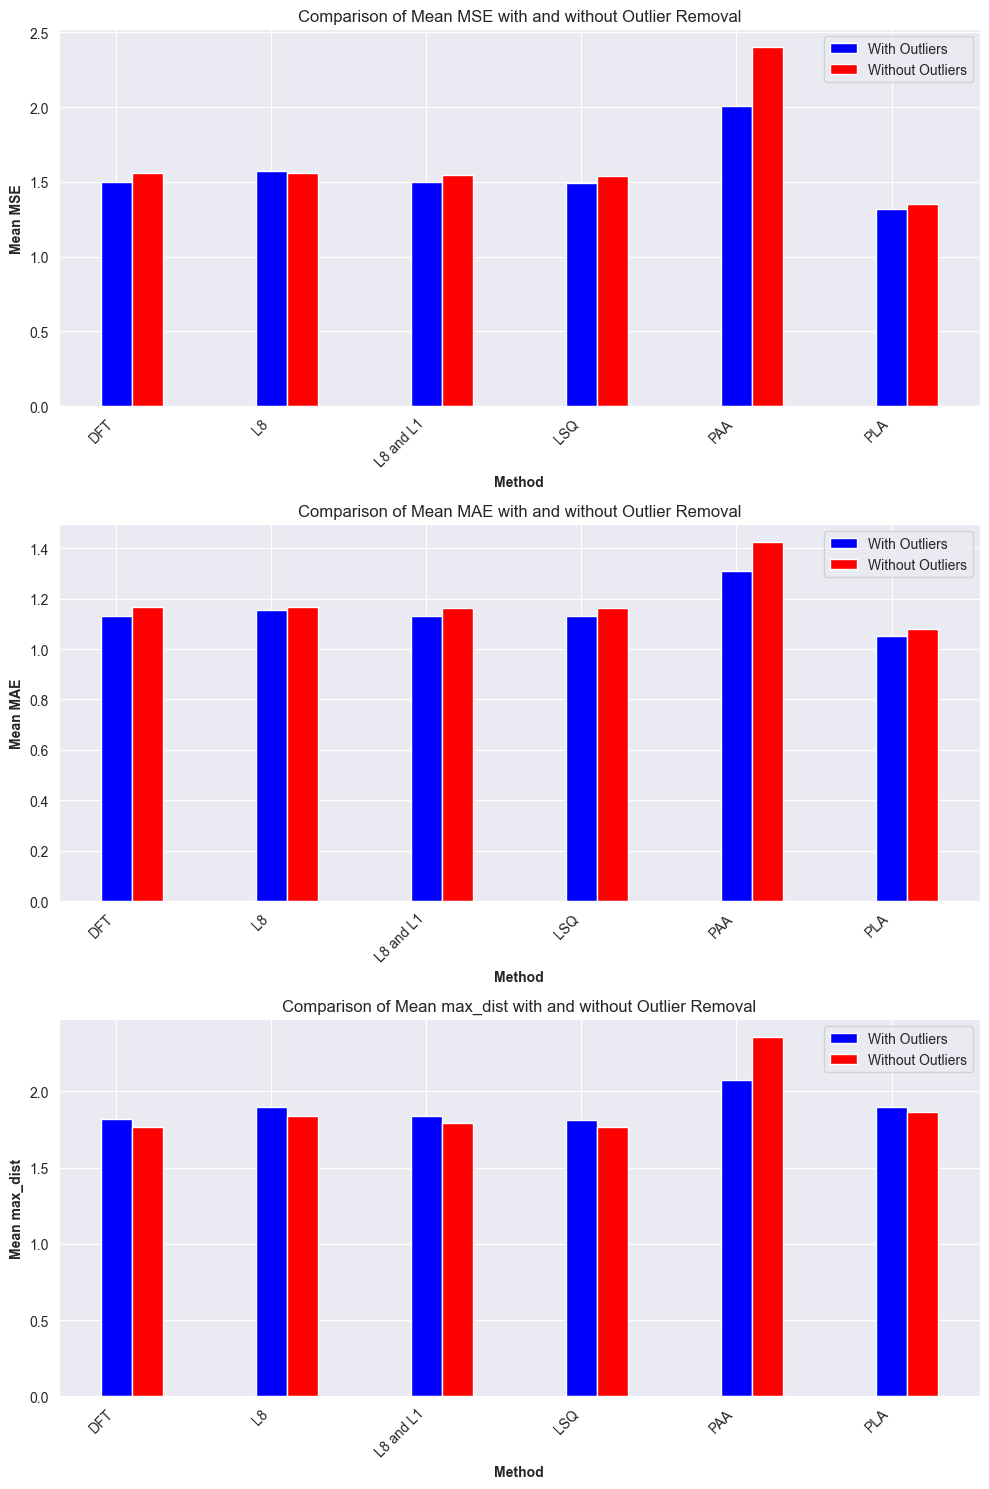

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual mean accuracy values)
methods = mean_values_combined['method']
metrics = ['MSE', 'MAE', 'max_dist']

# Set the width of the bars
bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

# Create subplots for each accuracy measure
fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    metric_with_outliers = mean_values_combined[metric]
    metric_without_outliers = mean_values_combined[f'{metric} w/o o.']

    # Set the position of the bars for each accuracy measure
    r1 = r + bar_width / 2
    r2 = [x + bar_width for x in r1]

    # Create the bar plots for each accuracy measure
    axs[i].bar(r1, metric_with_outliers, color='b', width=bar_width, label='With Outliers')
    axs[i].bar(r2, metric_without_outliers, color='r', width=bar_width, label='Without Outliers')

    # Add labels and title
    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width / 2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of Mean {metric} with and without Outlier Removal')
    axs[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
